In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler 
from scipy import stats
from scipy.stats import norm,skew
import warnings
from sklearn.preprocessing import RobustScaler
warnings.filterwarnings("ignore")
%matplotlib inline

# 讀取數據
train = pd.read_csv(r"C:\Users\rex\Desktop\賴老師連續流\part1\無氣提.csv") 

print (train)
train.head(5)



     Days    pH  Temp CH4 concentration (%)  Infulent VS  Influent TCOD (g/L)  \
0       0  7.03  35.0                     -          NaN                  NaN   
1       1  7.08  35.0                   43%        12.47                  NaN   
2       2  7.22  35.0                   53%        12.47               108.97   
3       3  7.22  35.0                   50%        12.47                  NaN   
4       4  7.24  35.0                   49%        12.47               108.97   
..    ...   ...   ...                   ...          ...                  ...   
204   223  7.29  34.0                   70%        14.43               128.50   
205   224  7.15  35.0                   68%        14.43                  NaN   
206   225  7.31  35.0                   69%        14.43               128.50   
207   226  7.29  35.0                   69%        14.43                  NaN   
208   227   NaN   NaN                   NaN          NaN                  NaN   

     Influent SCOD(g/L)  SC

,Days,pH,Temp,CH4 concentration (%),Infulent VS,Influent TCOD (g/L),Influent SCOD(g/L),SCOD(g/L),TCOD(g/L),TCOD removal(%),...,TS(g/L),VS(g/L),VS/TS(%),TS removal(%),VS removal(%),OLR (g-VS/(L· d)),MPR,MY,BPR,BY
0,0,7.03,35.0,-,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN
1,1,7.08,35.0,43%,12.47,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.27,107.0,0.63,251.0
2,2,7.22,35.0,53%,12.47,108.97,16.41,16.41,74.94,31.0,...,60.37,40.57,67%,44.0,38.0,2.17,0.26,106.0,0.50,202.0
3,3,7.22,35.0,50%,12.47,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.23,91.0,0.45,181.0
4,4,7.24,35.0,49%,12.47,108.97,16.41,17.33,61.65,43.0,...,47.85,30.82,64%,56.0,53.0,2.17,0.16,66.0,0.33,134.0


In [2]:
test = pd.read_csv(r"C:\Users\rex\Desktop\賴老師連續流\part1\氣提.csv")

print (test)
test.head(5)

     Days    pH  Temp CH4 concentration (%)  Infulent VS  Influent TCOD (g/L)  \
0       0  6.99  35.0                     -          NaN                  NaN   
1       1  7.30  35.0                   59%        12.47                  NaN   
2       2  7.27  35.0                   63%        12.47               108.97   
3       3  7.28  35.0                   56%        12.47                  NaN   
4       4  7.22  35.0                   59%        12.47               108.97   
..    ...   ...   ...                   ...          ...                  ...   
204   223  7.40  35.0                   68%        14.43               128.50   
205   224  7.38  35.0                   70%        14.43                  NaN   
206   225  7.39  24.0                   73%        14.43               128.50   
207   226  7.34  35.0                   68%        14.43                  NaN   
208   227   NaN   NaN                   NaN          NaN               128.50   

     Influent SCOD(g/L)  SC

,Days,pH,Temp,CH4 concentration (%),Infulent VS,Influent TCOD (g/L),Influent SCOD(g/L),SCOD(g/L),TCOD(g/L),TCOD removal(%),...,TS(g/L),VS(g/L),VS/TS(%),TS removal(%),VS removal(%),OLR (g-VS/(L· d)),MPR,MY,BPR,BY
0,0,6.99,35.0,-,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN
1,1,7.30,35.0,59%,12.47,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.37,149.0,0.63,251.0
2,2,7.27,35.0,63%,12.47,108.97,16.41,13.05,70.66,35.0,...,28.02,17.5,62%,74.0,73.0,2.17,0.12,47.0,0.19,74.0
3,3,7.28,35.0,56%,12.47,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.13,52.0,0.23,93.0
4,4,7.22,35.0,59%,12.47,108.97,16.41,14.82,58.58,46.0,...,29.13,17.8,61%,73.0,73.0,2.17,0.12,47.0,0.20,79.0


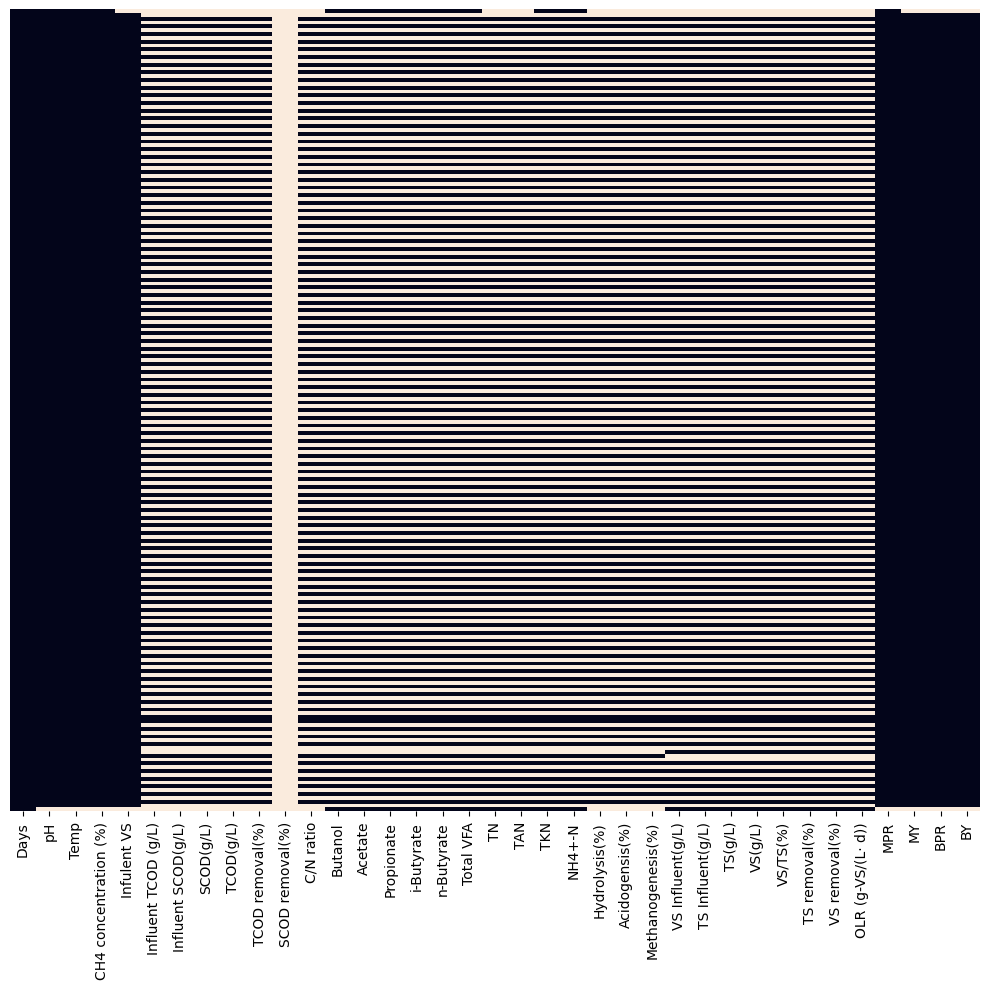

In [3]:
#isnull()看數據缺失值
plt.figure(figsize=(10,10)) 
sns.heatmap(train.isnull(), yticklabels=False, cbar=False)
plt.tight_layout() 
plt.show()

In [4]:
#看數據維度
print(train.shape)
#看數據訊息
train.info()

(209, 37)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 37 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Days                   209 non-null    int64  
 1   pH                     208 non-null    float64
 2   Temp                   208 non-null    float64
 3   CH4 concentration (%)  208 non-null    object 
 4   Infulent VS            207 non-null    float64
 5   Influent TCOD (g/L)    103 non-null    float64
 6   Influent SCOD(g/L)     103 non-null    float64
 7   SCOD(g/L)              103 non-null    float64
 8   TCOD(g/L)              103 non-null    float64
 9   TCOD removal(%)        103 non-null    float64
 10  SCOD removal(%)        0 non-null      float64
 11  C/N ratio              103 non-null    float64
 12  Butanol                105 non-null    float64
 13  Acetate                105 non-null    float64
 14  Propionate             105 non-null    float64
 

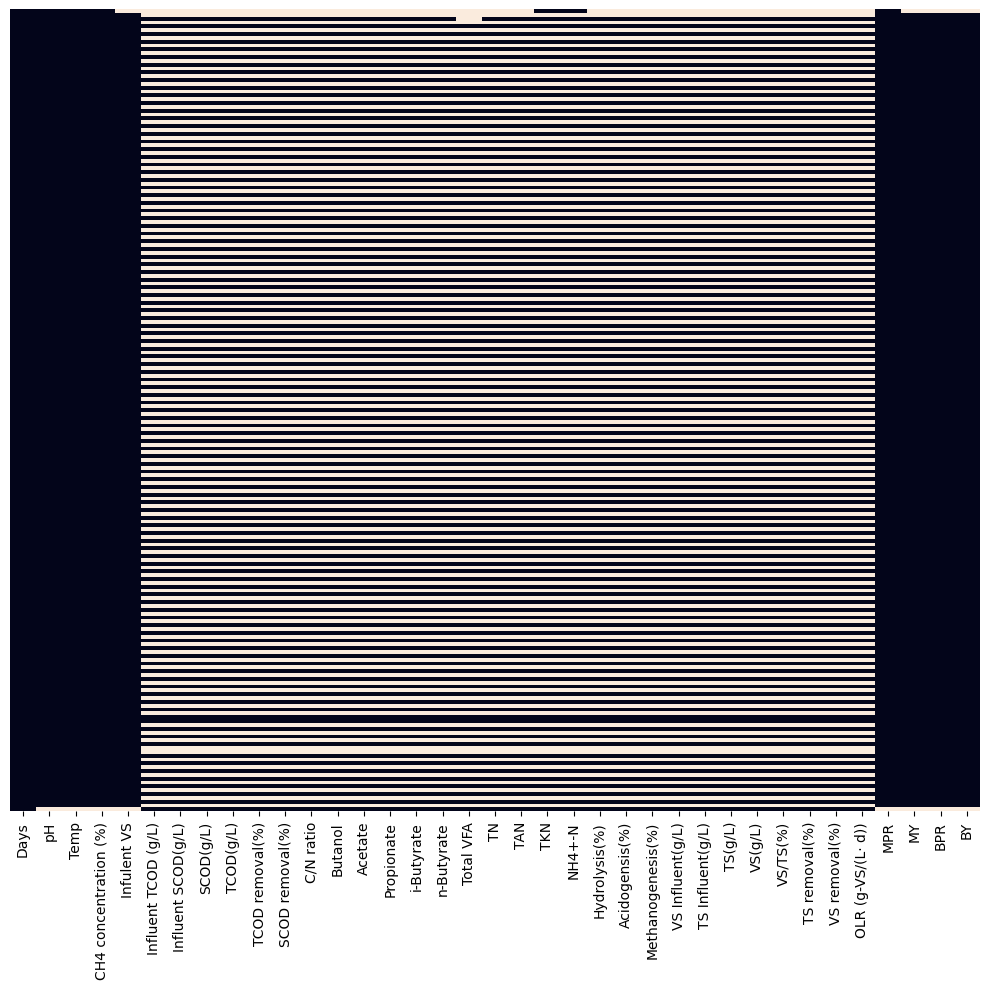

In [5]:
#isnull()看數據缺失值
plt.figure(figsize=(10,10)) 
sns.heatmap(test.isnull(), yticklabels=False, cbar=False)
plt.tight_layout() 
plt.show()

In [6]:
#看數據維度
print(test.shape)
#看數據訊息
test.info()

(209, 37)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 37 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Days                   209 non-null    int64  
 1   pH                     208 non-null    float64
 2   Temp                   208 non-null    float64
 3   CH4 concentration (%)  208 non-null    object 
 4   Infulent VS            207 non-null    float64
 5   Influent TCOD (g/L)    104 non-null    float64
 6   Influent SCOD(g/L)     104 non-null    float64
 7   SCOD(g/L)              104 non-null    float64
 8   TCOD(g/L)              104 non-null    float64
 9   TCOD removal(%)        104 non-null    float64
 10  SCOD removal(%)        104 non-null    float64
 11  C/N ratio              104 non-null    float64
 12  Butanol                104 non-null    float64
 13  Acetate                104 non-null    float64
 14  Propionate             104 non-null    float64
 

In [7]:
print(train.columns)
print(test.columns)

Index(['Days', 'pH', 'Temp', 'CH4 concentration (%)', 'Infulent VS',
       'Influent TCOD (g/L)', 'Influent SCOD(g/L)', 'SCOD(g/L)', 'TCOD(g/L)',
       'TCOD removal(%)', 'SCOD removal(%)', 'C/N ratio', 'Butanol', 'Acetate',
       'Propionate', 'i-Butyrate', 'n-Butyrate', 'Total VFA', 'TN', 'TAN',
       'TKN', 'NH4+-N', 'Hydrolysis(%)', 'Acidogensis(%)', 'Methanogenesis(%)',
       'VS Influent(g/L)', 'TS Influent(g/L)', 'TS(g/L)', 'VS(g/L)',
       'VS/TS(%)', 'TS removal(%)', 'VS removal(%)', 'OLR (g-VS/(L· d))',
       'MPR', 'MY', 'BPR', 'BY'],
      dtype='object')
Index(['Days', 'pH', 'Temp', 'CH4 concentration (%)', 'Infulent VS',
       'Influent TCOD (g/L)', 'Influent SCOD(g/L)', 'SCOD(g/L)', 'TCOD(g/L)',
       'TCOD removal(%)', 'SCOD removal(%)', 'C/N ratio', 'Butanol', 'Acetate',
       'Propionate', 'i-Butyrate', 'n-Butyrate', 'Total VFA', 'TN', 'TAN',
       'TKN', 'NH4+-N', 'Hydrolysis(%)', 'Acidogensis(%)', 'Methanogenesis(%)',
       'VS Influent(g/L)', 'TS Influe

In [8]:
pd.set_option('display.max_columns', None)  # 顯示所有列
pd.set_option('display.max_rows', None)  # 顯示所有行
train.describe()

# stats_df = train.describe()
# stats_df.to_excel(r'C:\Users\rex\Desktop\賴老師連續流\part1\無氣提統計.xlsx')

,Days,pH,Temp,Infulent VS,Influent TCOD (g/L),Influent SCOD(g/L),SCOD(g/L),TCOD(g/L),TCOD removal(%),SCOD removal(%),C/N ratio,Butanol,Acetate,Propionate,i-Butyrate,n-Butyrate,Total VFA,TN,TAN,TKN,NH4+-N,Hydrolysis(%),Acidogensis(%),Methanogenesis(%),VS Influent(g/L),TS Influent(g/L),TS(g/L),VS(g/L),TS removal(%),VS removal(%),OLR (g-VS/(L· d)),MPR,MY,BPR,BY
count,209.000000,208.000000,208.000000,207.000000,103.000000,103.000000,103.000000,103.000000,103.000000,0.0,103.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,104.000000,104.000000,105.000000,105.000000,103.000000,103.000000,103.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,208.000000,207.000000,207.000000,207.000000
mean,106.181818,7.410817,34.360577,12.809082,117.871456,16.547573,11.563204,46.978350,59.815534,NaN,10.370000,180.542857,1539.361905,323.161905,151.295238,288.333333,2302.209524,4659.942308,3132.769231,4661.714286,3117.000000,48.126214,49.398058,48.155340,83.126154,109.654038,43.496058,24.951731,60.346154,68.711538,2.765385,0.494038,195.149758,0.887005,349.657005
std,64.030833,0.068622,3.986667,0.641962,9.596070,4.978048,6.054846,11.844266,10.696112,NaN,3.324858,332.810122,1072.613210,213.942620,111.349582,309.774287,1367.424627,914.625520,758.296702,910.398747,771.748091,18.182452,16.210829,16.078702,14.656012,11.220153,8.426847,5.768627,6.757620,10.550547,0.483360,0.185793,71.047651,0.317708,125.399646
min,0.000000,7.030000,17.000000,12.470000,103.000000,8.000000,4.000000,20.180000,31.000000,NaN,4.930000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2353.000000,1419.000000,2353.000000,1419.000000,11.000000,13.000000,12.000000,60.100000,86.400000,21.850000,9.850000,40.000000,34.000000,2.000000,0.000000,46.000000,0.230000,92.000000
25%,52.000000,7.407500,35.000000,12.470000,108.970000,12.000000,6.240000,40.550000,54.500000,NaN,8.375000,0.000000,799.000000,194.000000,74.000000,98.000000,1386.000000,4209.000000,2558.500000,4244.000000,2500.000000,41.000000,42.500000,40.000000,66.600000,104.100000,40.385000,21.912500,56.000000,63.000000,2.220000,0.370000,145.000000,0.650000,249.500000
50%,104.000000,7.430000,35.000000,12.470000,119.000000,17.000000,9.550000,44.580000,60.000000,NaN,9.350000,79.000000,1206.000000,281.000000,132.000000,166.000000,1998.000000,4664.000000,3504.000000,4664.000000,3503.000000,51.000000,51.000000,49.000000,88.100000,109.500000,44.590000,24.995000,61.000000,70.000000,2.940000,0.510000,203.000000,0.900000,362.000000
75%,156.000000,7.450000,35.000000,13.280000,125.000000,20.000000,16.190000,55.165000,67.000000,NaN,11.115000,120.000000,2258.000000,411.000000,200.000000,270.000000,2777.000000,5158.500000,3732.500000,5141.000000,3731.000000,58.000000,58.000000,56.000000,94.500000,119.100000,46.470000,27.307500,65.000000,76.000000,3.150000,0.590000,237.000000,1.070000,430.000000
max,227.000000,7.620000,39.000000,14.430000,135.000000,24.640000,32.930000,76.020000,84.000000,NaN,19.460000,1521.000000,5479.000000,1014.000000,416.000000,1422.000000,6678.000000,6513.000000,3996.000000,6513.000000,3996.000000,88.000000,88.000000,85.000000,105.100000,124.200000,63.210000,40.570000,75.000000,89.000000,3.500000,0.940000,355.000000,1.630000,614.000000


In [9]:
# ND轉換NA
train = train.replace("ND", pd.NA)
test = test.replace("ND" , pd.NA)

# 將百分比轉換為數值
percentage_cols = ["SCOD removal(%)", "TCOD removal(%)", "C/N ratio", "Hydrolysis(%)", "Acidogensis(%)", "Methanogenesis(%)", "VS/TS(%)", "TS removal(%)", "VS removal(%)", "CH4 concentration (%)"]
for col in percentage_cols:
    # 確保所有值為字串型態
    train[col] = train[col].astype(str)
    test[col] = test[col].astype(str)
    
    # 如果該值包含數字和%，則將 "%" 字符去掉並轉換為浮點數；否則直接轉換為浮點數
    train[col] = train[col].apply(lambda x: float(x.replace("%", "")) / 100.0 if "%" in x else float(x) / 100.0 if x.replace(".", "").isdigit() else np.nan)
    test[col] = test[col].apply(lambda x: float(x.replace("%", "")) / 100.0 if "%" in x else float(x) / 100.0 if x.replace(".", "").isdigit() else np.nan)

# # 處理ND值，如果某個特徵有連續20個ND，就刪除該特徵
# features_to_drop = [column for column in train.columns if (train[column] == "ND").rolling(window=10).sum().max() >= 20]
# train = train.drop(columns=features_to_drop)

# 使用前後的值加總除以2進行插值
train = train.interpolate(method="linear")
test = test.interpolate(method="linear")



#看數據維度
print(train.shape)
print(test.shape)


(209, 37)
(209, 37)


In [10]:
print (train)
train.head(5)

     Days    pH  Temp  CH4 concentration (%)  Infulent VS  \
0       0  7.03  35.0                    NaN          NaN   
1       1  7.08  35.0                   0.43        12.47   
2       2  7.22  35.0                   0.53        12.47   
3       3  7.22  35.0                   0.50        12.47   
4       4  7.24  35.0                   0.49        12.47   
5       5  7.24  35.0                   0.49        12.47   
6       6  7.25  35.0                   0.48        12.47   
7       7  7.29  35.0                   0.56        12.47   
8       8  7.29  35.0                   0.49        12.47   
9       9  7.24  35.0                   0.47        12.47   
10     10  7.25  35.0                   0.55        12.47   
11     11  7.38  35.0                   0.61        12.47   
12     12  7.33  35.0                   0.60        12.47   
13     13  7.34  35.0                   0.55        12.47   
14     14  7.30  35.0                   0.57        12.47   
15     15  7.40  35.0   

,Days,pH,Temp,CH4 concentration (%),Infulent VS,Influent TCOD (g/L),Influent SCOD(g/L),SCOD(g/L),TCOD(g/L),TCOD removal(%),SCOD removal(%),C/N ratio,Butanol,Acetate,Propionate,i-Butyrate,n-Butyrate,Total VFA,TN,TAN,TKN,NH4+-N,Hydrolysis(%),Acidogensis(%),Methanogenesis(%),VS Influent(g/L),TS Influent(g/L),TS(g/L),VS(g/L),VS/TS(%),TS removal(%),VS removal(%),OLR (g-VS/(L· d)),MPR,MY,BPR,BY
0,0,7.03,35.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,4846.0,1477.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN
1,1,7.08,35.0,0.43,12.47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.0,73.5,43.0,60.0,55.5,232.5,NaN,NaN,4349.0,1988.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.27,107.0,0.63,251.0
2,2,7.22,35.0,0.53,12.47,108.97,16.41,16.41,74.940,0.31,NaN,0.1946,60.0,147.0,86.0,120.0,111.0,465.0,3852.0,2500.0,3852.0,2500.0,0.26,0.26,0.26,65.18,108.3,60.37,40.570,0.670,0.44,0.380,2.17,0.26,106.0,0.50,202.0
3,3,7.22,35.0,0.50,12.47,108.97,16.41,16.87,68.295,0.37,NaN,0.1785,52.0,463.5,158.5,121.5,441.5,1185.5,3824.0,2365.0,3824.0,2365.0,0.21,0.22,0.22,65.18,108.3,54.11,35.695,0.655,0.50,0.455,2.17,0.23,91.0,0.45,181.0
4,4,7.24,35.0,0.49,12.47,108.97,16.41,17.33,61.650,0.43,NaN,0.1624,44.0,780.0,231.0,123.0,772.0,1906.0,3796.0,2230.0,3796.0,2230.0,0.16,0.18,0.18,65.18,108.3,47.85,30.820,0.640,0.56,0.530,2.17,0.16,66.0,0.33,134.0


In [11]:
print (test)
test.head(5)

     Days    pH  Temp  CH4 concentration (%)  Infulent VS  \
0       0  6.99  35.0                    NaN          NaN   
1       1  7.30  35.0                   0.59        12.47   
2       2  7.27  35.0                   0.63        12.47   
3       3  7.28  35.0                   0.56        12.47   
4       4  7.22  35.0                   0.59        12.47   
5       5  7.25  35.0                   0.60        12.47   
6       6  7.23  35.0                   0.51        12.47   
7       7  7.25  35.0                   0.59        12.47   
8       8  7.22  35.0                   0.51        12.47   
9       9  7.38  35.0                   0.03        12.47   
10     10  7.40  35.0                   0.00        12.47   
11     11  7.36  35.0                   0.07        12.47   
12     12  7.24  35.0                   0.17        12.47   
13     13  7.29  35.0                   0.30        12.47   
14     14  7.35  35.0                   0.41        12.47   
15     15  7.39  35.0   

,Days,pH,Temp,CH4 concentration (%),Infulent VS,Influent TCOD (g/L),Influent SCOD(g/L),SCOD(g/L),TCOD(g/L),TCOD removal(%),SCOD removal(%),C/N ratio,Butanol,Acetate,Propionate,i-Butyrate,n-Butyrate,Total VFA,TN,TAN,TKN,NH4+-N,Hydrolysis(%),Acidogensis(%),Methanogenesis(%),VS Influent(g/L),TS Influent(g/L),TS(g/L),VS(g/L),VS/TS(%),TS removal(%),VS removal(%),OLR (g-VS/(L· d)),MPR,MY,BPR,BY
0,0,6.99,35.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4846.0,1477.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN
1,1,7.30,35.0,0.59,12.47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4902.0,1904.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.37,149.0,0.63,251.0
2,2,7.27,35.0,0.63,12.47,108.97,16.41,13.050,70.66,0.350,0.20,0.18340,0.0,1219.0,219.0,193.0,958.0,NaN,4958.0,2332.0,4958.0,2332.0,0.03,0.09,0.1,65.18,108.3,28.020,17.50,0.620,0.740,0.73,2.17,0.12,47.0,0.19,74.0
3,3,7.28,35.0,0.56,12.47,108.97,16.41,13.935,64.62,0.405,0.15,0.16885,0.0,1058.0,203.5,193.0,950.5,NaN,4846.0,2224.0,4846.0,2224.0,0.04,0.10,0.1,65.18,108.3,28.575,17.65,0.615,0.735,0.73,2.17,0.13,52.0,0.23,93.0
4,4,7.22,35.0,0.59,12.47,108.97,16.41,14.820,58.58,0.460,0.10,0.15430,0.0,897.0,188.0,193.0,943.0,2221.0,4734.0,2116.0,4734.0,2116.0,0.05,0.11,0.1,65.18,108.3,29.130,17.80,0.610,0.730,0.73,2.17,0.12,47.0,0.20,79.0


In [12]:
# fig, ax = plt.subplots()  #fig表示新創建的數字(Figure)對象，ax表示新創建的子圖(subplot)
# ax.scatter(x = train['SCOD(g/L)'],y = train['MY'])   #繪製點散圖
# plt.ylabel('MY',fontsize = 13)   #fontsize = 13 字體大小
# plt.xlabel('SCOD(g/L)',fontsize = 13)
# plt.show()

In [13]:
# #異常值處理
# train = train.drop(train[(train['SCOD(g/L)']>30) & (train['MY']<200)].index)

# fig, ax = plt.subplots()
# ax.scatter(x = train['SCOD(g/L)'],y = train['MY'])
# plt.ylabel('MY',fontsize = 13)   #fontsize = 13 字體大小
# plt.xlabel('SCOD(g/L)',fontsize = 13)
# plt.show()

In [14]:
# fig, ax = plt.subplots()  #fig表示新創建的數字(Figure)對象，ax表示新創建的子圖(subplot)
# ax.scatter(x = train['Acetate'],y = train['MY'])   #繪製點散圖
# plt.ylabel('MY',fontsize = 13)   #fontsize = 13 字體大小
# plt.xlabel('Acetate',fontsize = 13)
# plt.show()

In [15]:
# #異常值處理
# train = train.drop(train[(train['Acetate']>5000) & (train['MY']<250)].index)

# fig, ax = plt.subplots()
# ax.scatter(x = train['Acetate'],y = train['MY'])
# plt.ylabel('MY',fontsize = 13)   #fontsize = 13 字體大小
# plt.xlabel('Acetate',fontsize = 13)
# plt.show()

In [16]:
# fig, ax = plt.subplots()  #fig表示新創建的數字(Figure)對象，ax表示新創建的子圖(subplot)
# ax.scatter(x = test['n-Butyrate'],y = test['MY'])   #繪製點散圖
# plt.ylabel('MY',fontsize = 13)   #fontsize = 13 字體大小
# plt.xlabel('n-Butyrate',fontsize = 13)
# plt.show()

In [17]:
# #異常值處理
# test = test.drop(test[(test['n-Butyrate']>838.7) & (test['MY']<100)].index)

# fig, ax = plt.subplots()
# ax.scatter(x = test['n-Butyrate'],y = test['MY'])
# plt.ylabel('MY',fontsize = 13)   #fontsize = 13 字體大小
# plt.xlabel('n-Butyrate',fontsize = 13)
# plt.show()

In [18]:
# # 使用線性插值來填充缺失的值
# train["MY"] = train["MY"].interpolate(method="linear", limit_direction="both")
# test["MY"] = test["MY"].interpolate(method="linear", limit_direction="both")


# train["CH4 concentration (%)"] = train["CH4 concentration (%)"].interpolate(method="linear", limit_direction="both")
# test["CH4 concentration (%)"] = test["CH4 concentration (%)"].interpolate(method="linear", limit_direction="both")

train["SCOD removal(%)"] = train["SCOD removal(%)"].fillna(0)

train = train.iloc[2:].reset_index(drop=True)
test = test.iloc[2:].reset_index(drop=True)

# train = train.interpolate(method="linear", limit_direction="both")
test = test.interpolate(method="linear", limit_direction="backward")

In [19]:
# # 找到Butanol列中的最低值
# butanol_min = train['Butanol'].min()
# butanol_min = test['Butanol'].min()

# # 將Butanol列中為0的值替換為最低值
# train.loc[train['Butanol'] == 0, 'Butanol'] = butanol_min
# test.loc[test['Butanol'] == 0, 'Butanol'] = butanol_min

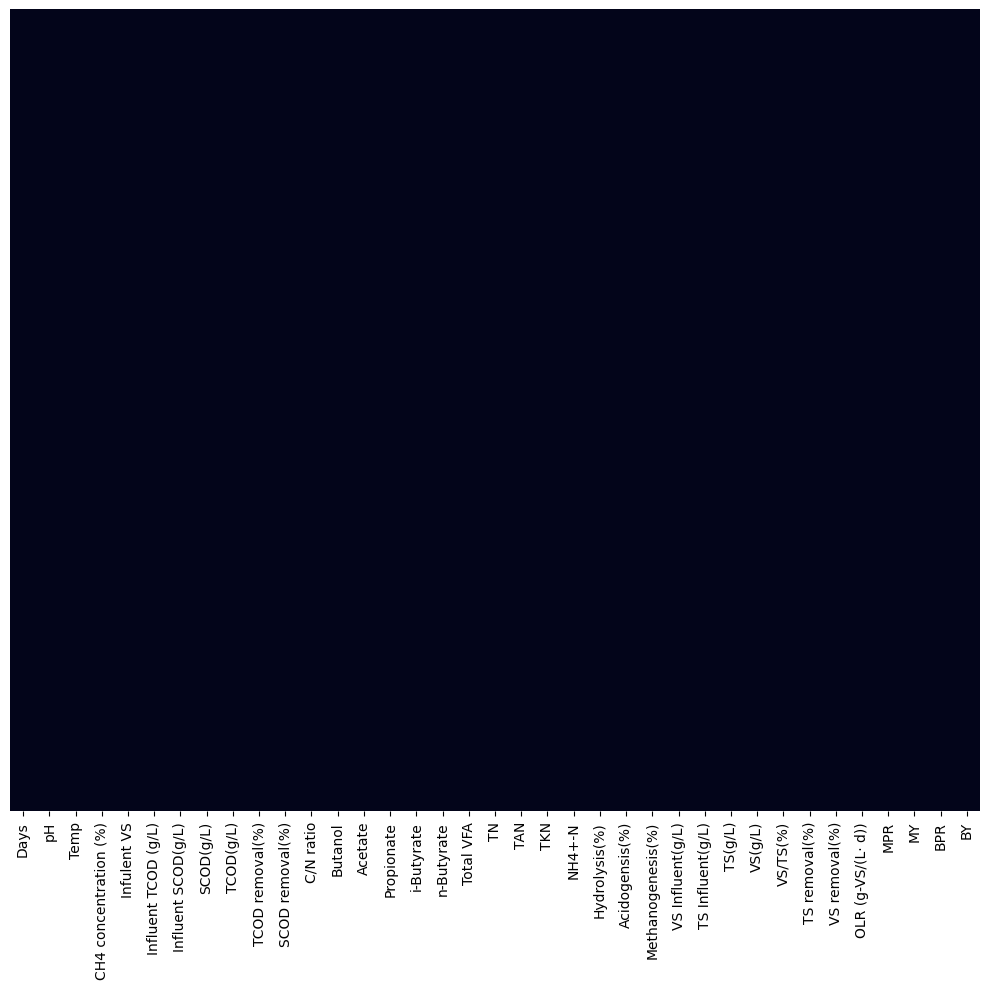

In [20]:
#isnull()看數據缺失值
plt.figure(figsize=(10,10)) 
sns.heatmap(test.isnull(), yticklabels=False, cbar=False)
plt.tight_layout() 
plt.show()

In [21]:
#看數據維度
print(train.shape)
#看數據訊息
train.info()

(207, 37)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 37 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Days                   207 non-null    int64  
 1   pH                     207 non-null    float64
 2   Temp                   207 non-null    float64
 3   CH4 concentration (%)  207 non-null    float64
 4   Infulent VS            207 non-null    float64
 5   Influent TCOD (g/L)    207 non-null    float64
 6   Influent SCOD(g/L)     207 non-null    float64
 7   SCOD(g/L)              207 non-null    float64
 8   TCOD(g/L)              207 non-null    float64
 9   TCOD removal(%)        207 non-null    float64
 10  SCOD removal(%)        207 non-null    float64
 11  C/N ratio              207 non-null    float64
 12  Butanol                207 non-null    float64
 13  Acetate                207 non-null    float64
 14  Propionate             207 non-null    float64
 

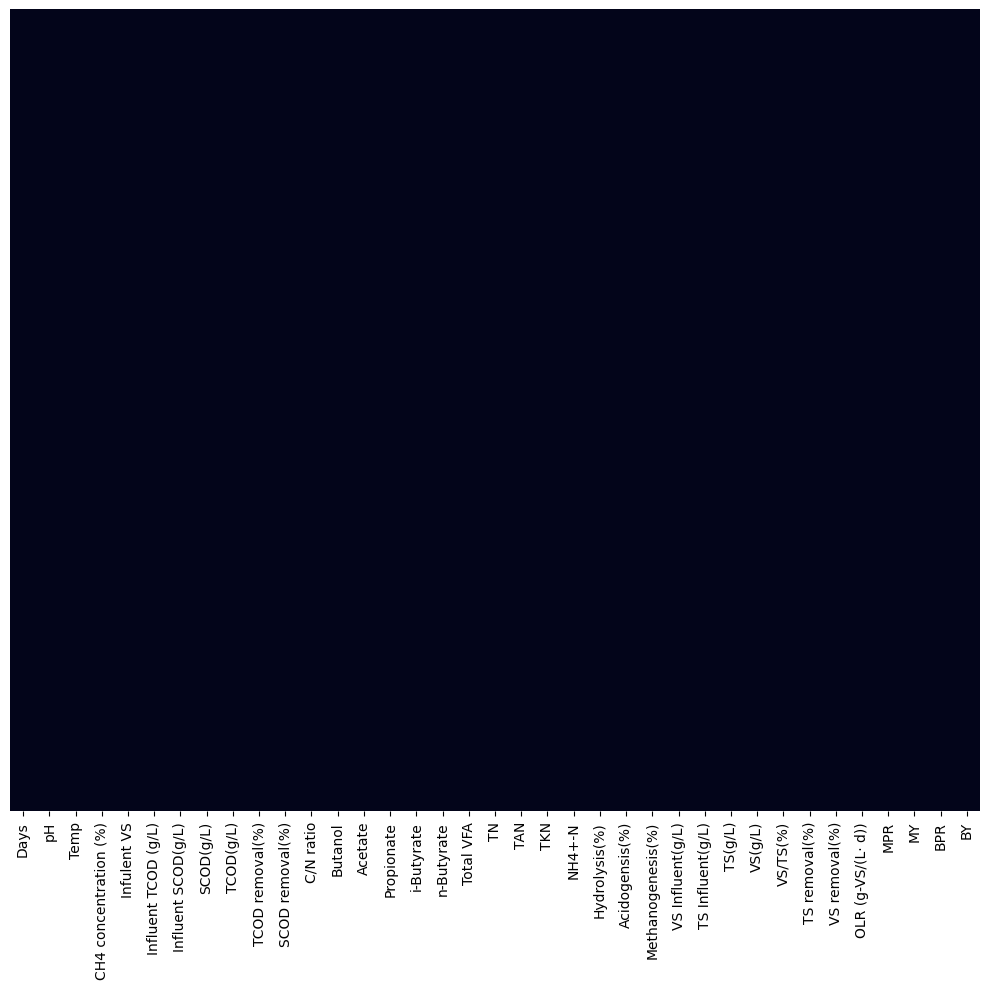

In [22]:
#isnull()看數據缺失值
plt.figure(figsize=(10,10)) 
sns.heatmap(test.isnull(), yticklabels=False, cbar=False)
plt.tight_layout() 
plt.show()

In [23]:
#看數據維度
print(test.shape)
#看數據訊息
test.info()

(207, 37)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 37 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Days                   207 non-null    int64  
 1   pH                     207 non-null    float64
 2   Temp                   207 non-null    float64
 3   CH4 concentration (%)  207 non-null    float64
 4   Infulent VS            207 non-null    float64
 5   Influent TCOD (g/L)    207 non-null    float64
 6   Influent SCOD(g/L)     207 non-null    float64
 7   SCOD(g/L)              207 non-null    float64
 8   TCOD(g/L)              207 non-null    float64
 9   TCOD removal(%)        207 non-null    float64
 10  SCOD removal(%)        207 non-null    float64
 11  C/N ratio              207 non-null    float64
 12  Butanol                207 non-null    float64
 13  Acetate                207 non-null    float64
 14  Propionate             207 non-null    float64
 

In [24]:
# plt.figure(figsize=(8,5))
# plt.boxplot(train['CH4 concentration (%)'],showmeans=True)
# plt.title('CH4 concentration (%)')
# plt.show()


mu = 0.50 and sigma = 0.18



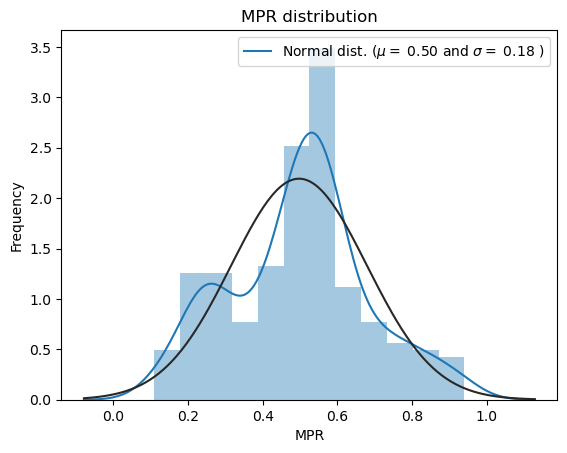

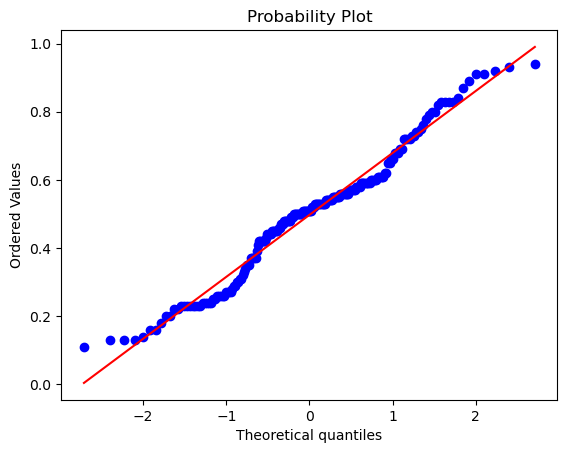


mu = 195.39 and sigma = 70.66



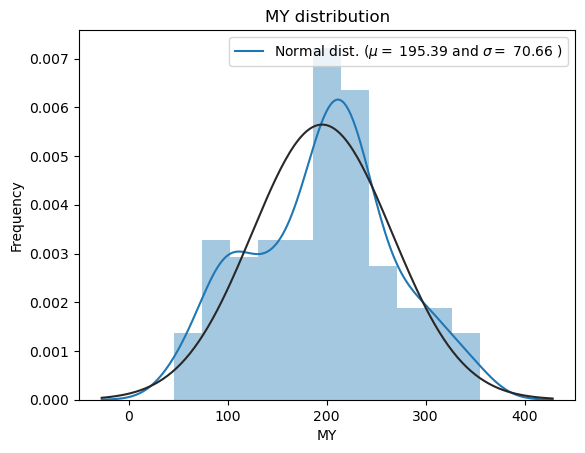

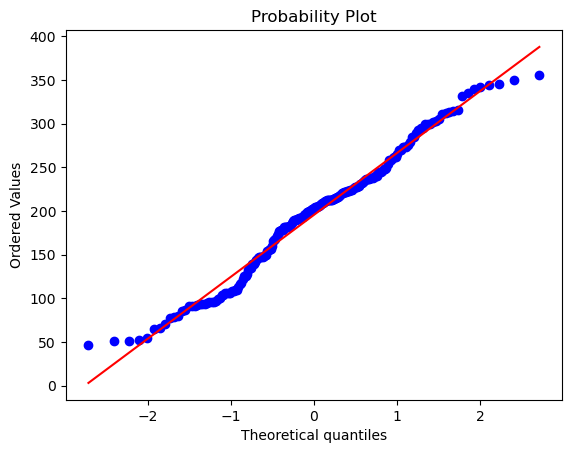


mu = 0.89 and sigma = 0.32



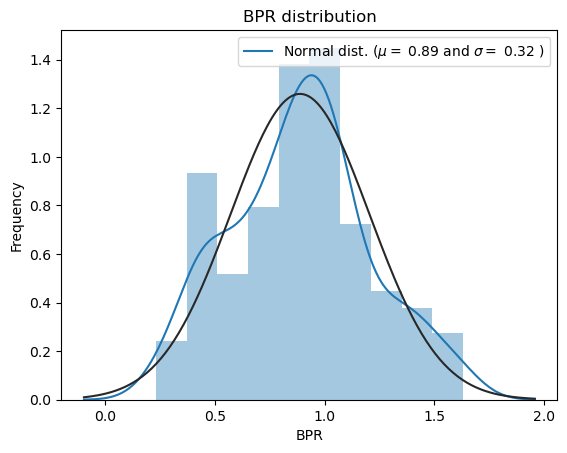

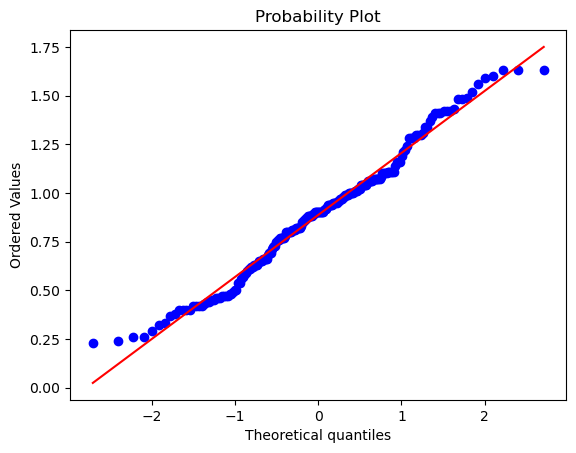


mu = 349.55 and sigma = 125.19



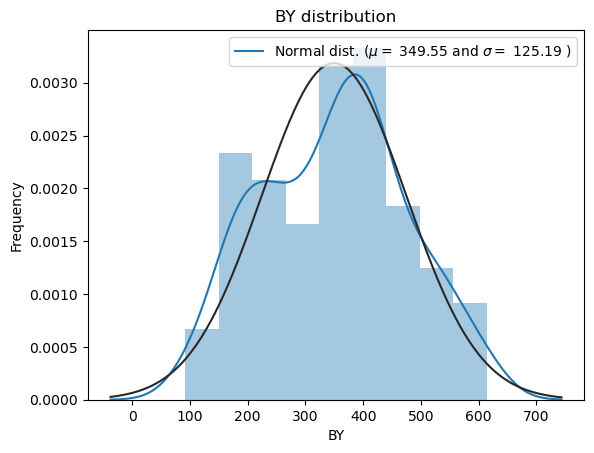

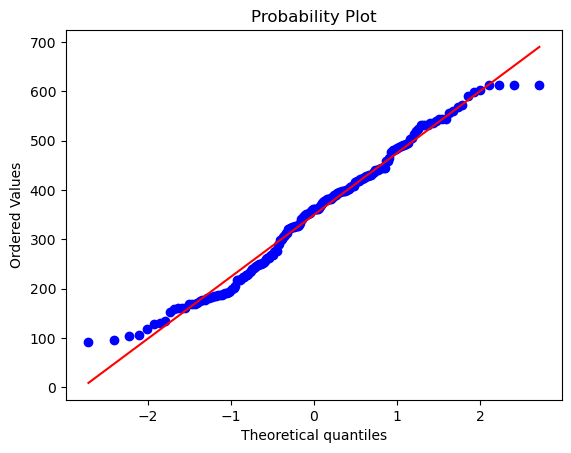

In [25]:
# 分析目標變量的分布，計算均值與標準差
targets = ["MPR", "MY", "BPR", "BY"]

for target in targets:
    
    sns.distplot(train[target], fit=norm)   #sns.distplot用於繪製一個變量的概率密度函數(PDF)和核密度估計(KDE)
    
    (mu, sigma) = norm.fit(train[target])   #norm.fit對SalePrice變量進行最大似然估計(MLE)，mu:正態分布的均值，sigma:正態分布的標準差。
    print('\nmu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))   #\n換行，{:.2f}是一個格式化字符串，會被替換為mu和sigma的值，以保留兩位小數輸出。
    
    plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')    #plt.legend用於給圖標添加圖例，loc='best' 將圖例放置在當前圖形最佳位置，避免遮擋數據
    plt.ylabel('Frequency')
    plt.title('{} distribution'.format(target))   
    
    fig = plt.figure()  #創建一個新的圖形窗口
    res = stats.probplot(train[target], plot=plt)   #res表示用於比較的理論分佈，stats.probplot為一個概率圖函數，繪製數據樣本分佈與理論分佈之間的比較。
    
    plt.show()

In [26]:
# # log對數變換
# train["MPR"] = np.log1p(train["MPR"])  #np.log1p函數將()變量中的所有值都加上1，然後取對數。可以有效的消除數據中的偏度和峰度。使其更接近正態分佈。

# sns.distplot(train["MPR"] , fit=norm); 
 
# (mu, sigma) = norm.fit(train['MPR'])
# print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
 
# plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
#             loc='best')
# plt.ylabel('SCOD(g/L)')
# plt.title('MPR distribution')
# fig = plt.figure()
# res = stats.probplot(train['MPR'], plot=plt)
# plt.show()

In [27]:
#對分類變量編碼
from sklearn.preprocessing import LabelEncoder
cols = ('Days', 'pH', 'Temp', 'CH4 concentration (%)', 'Infulent VS',
                     'Influent TCOD (g/L)', 'Influent SCOD(g/L)', 'SCOD(g/L)', 'TCOD(g/L)',
                     'TCOD removal(%)', 'SCOD removal(%)', 'C/N ratio', 'Butanol', 'Acetate',
                     'Propionate', 'i-Butyrate', 'n-Butyrate', 'Total VFA', 'TN', 'TAN',
                     'TKN', 'NH4+-N', 'Hydrolysis(%)', 'Acidogensis(%)', 'Methanogenesis(%)',
                     'VS Influent(g/L)', 'TS Influent(g/L)', 'TS(g/L)', 'VS(g/L)',
                     'VS/TS(%)', 'TS removal(%)', 'VS removal(%)', 'OLR (g-VS/(L· d))',
                     'MPR', 'MY', 'BPR', 'BY')

for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(train[c].values)) 
    train[c] = lbl.transform(list(train[c].values))

for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(test[c].values)) 
    test[c] = lbl.transform(list(test[c].values))    
 
#查看數據維度        
print('Shape all_data: {}'.format(train.shape))
print('Shape all_data: {}'.format(test.shape))

Shape all_data: (207, 37)
Shape all_data: (207, 37)


In [28]:
##One-HotEncoder
# from sklearn.preprocessing import OneHotEncoder

# # 定義要進行 One-Hot 編碼的欄位
# columns_to_encode = ['Days', 'pH', 'Temp', 'CH4 concentration (%)', 'Infulent VS',
#                      'Influent TCOD (g/L)', 'Influent SCOD(g/L)', 'SCOD(g/L)', 'TCOD(g/L)',
#                      'TCOD removal(%)', 'SCOD removal(%)', 'C/N ratio', 'Butanol', 'Acetate',
#                      'Propionate', 'i-Butyrate', 'n-Butyrate', 'Total VFA', 'TN', 'TAN',
#                      'TKN', 'NH4+-N', 'Hydrolysis(%)', 'Acidogensis(%)', 'Methanogenesis(%)',
#                      'VS Influent(g/L)', 'TS Influent(g/L)', 'TS(g/L)', 'VS(g/L)',
#                      'VS/TS(%)', 'TS removal(%)', 'VS removal(%)', 'OLR (g-VS/(L· d))',
#                      'MPR', 'MY', 'BPR', 'BY']

# # 初始化 One-Hot 編碼器
# encoder = OneHotEncoder()

# encoder = OneHotEncoder(handle_unknown='ignore')

# # 對 train 資料進行 One-Hot 編碼
# train_encoded = encoder.fit_transform(train[columns_to_encode])

# # 對 test 資料進行 One-Hot 編碼
# test_encoded = encoder.transform(test[columns_to_encode])

# # 檢查編碼後的資料維度
# print('編碼後訓練資料的維度:', train_encoded.shape)
# print('編碼後測試資料的維度:', test_encoded.shape)


In [29]:
p_values = []

# 只針對數值型欄位進行操作
for column in train.select_dtypes(include=[np.number]).columns:  
    # 處理NaN值
    train_col = train[column].dropna()
    test_col = test[column].dropna()
    
    # 檢查是否有足夠的樣本
    if len(train_col) < 2 or len(test_col) < 2:
        print(f"欄位 {column} 的數據不足以進行 t 檢定")
        continue
    
    # 使用t檢定比較每個變數
    t_stat, p_val = stats.ttest_ind(train_col, test_col)
    p_values.append(p_val)

# 使用 Bonferroni 方法進行多重比較校正
alpha = 0.05  # 顯著性水平
n_tests = len(p_values)
p_values_corrected = np.array(p_values) * n_tests  # 進行校正

# 打印每個變數及其經過校正的 p 值
for column, p_val in zip(train.select_dtypes(include=[np.number]).columns, p_values_corrected):
    is_significant = p_val < alpha  # 判斷是否顯著
    print(f'{column}: {"顯著" if is_significant else "不顯著"} (p-value: {p_val})')


Days: 不顯著 (p-value: 37.0)
pH: 不顯著 (p-value: 3.1377032669336744)
Temp: 不顯著 (p-value: 0.2519804686150077)
CH4 concentration (%): 顯著 (p-value: 1.809354288428082e-32)
Infulent VS: 不顯著 (p-value: 37.0)
Influent TCOD (g/L): 不顯著 (p-value: 37.0)
Influent SCOD(g/L): 不顯著 (p-value: 37.0)
SCOD(g/L): 不顯著 (p-value: 25.34717761125384)
TCOD(g/L): 不顯著 (p-value: 19.461729440244053)
TCOD removal(%): 不顯著 (p-value: 1.5925085987955476)
SCOD removal(%): 顯著 (p-value: 3.845315048044636e-95)
C/N ratio: 不顯著 (p-value: 24.105531809246653)
Butanol: 顯著 (p-value: 1.570407145927915e-17)
Acetate: 不顯著 (p-value: 0.21037368970175807)
Propionate: 不顯著 (p-value: 3.189829162330139)
i-Butyrate: 不顯著 (p-value: 0.08996728496667557)
n-Butyrate: 不顯著 (p-value: 0.41399564539066125)
Total VFA: 不顯著 (p-value: 23.582974248170455)
TN: 不顯著 (p-value: 0.3368898151709975)
TAN: 不顯著 (p-value: 4.326681196133178)
TKN: 不顯著 (p-value: 0.3368898151709975)
NH4+-N: 不顯著 (p-value: 4.326681196133178)
Hydrolysis(%): 顯著 (p-value: 2.1018696108853458e-08)
Acid

In [30]:
# # 將顯著的變數作為特徵
# significant_features = ['Methanogenesis(%)', 'Acidogensis(%)', 'Hydrolysis(%)', 'VS Influent(g/L)', 'TS Influent(g/L)', 'OLR (g-VS/(L· d))']
# X_train = train[significant_features]
# y_train = train['MPR']  # 將'MPR'作為目標變數

# # 創建並訓練隨機森林回歸模型
# rf_model = RandomForestRegressor()
# rf_model.fit(X_train, y_train)

# # 在測試集上進行預測
# X_test = test[significant_features]
# y_test = test['MPR']
# y_pred = rf_model.predict(X_test)
# # 
# # 評估模型性能
# mse = mean_squared_error(y_test, y_pred)
# r2 = rf_model.score(X_test, y_test)

# print('均方誤差（MSE）：', mse)
# print('決定係數（R-squared）：', r2)


In [31]:
# #多重比較

# from statsmodels.stats.multicomp import pairwise_tukeyhsd

# # 創建一個空的DataFrame來存儲結果
# tukey_results_df = pd.DataFrame(columns=['Variable 1', 'Variable 2', 'Difference', 'Lower CI', 'Upper CI', 'Reject Null'])

# # 進行所有變數之間的Tukey's HSD比較
# for i in range(len(train.select_dtypes(include=[np.number]).columns)):
#     for j in range(i+1, len(train.select_dtypes(include=[np.number]).columns)):
#         variable_1 = train.select_dtypes(include=[np.number]).columns[i]
#         variable_2 = train.select_dtypes(include=[np.number]).columns[j]
        
#         # 執行Tukey's HSD比較
#         tukey_results = pairwise_tukeyhsd(train[variable_1], train[variable_2])
        
#         # 提取重要結果
#         difference = tukey_results.meandiffs[0]
#         lower_ci = tukey_results.confint[0][0]
#         upper_ci = tukey_results.confint[0][1]
#         reject_null = tukey_results.reject[0]
        
#         # 將結果添加到DataFrame中
#         tukey_results_df = tukey_results_df.append({'Variable 1': variable_1,
#                                                     'Variable 2': variable_2,
#                                                     'Difference': difference,
#                                                     'Lower CI': lower_ci,
#                                                     'Upper CI': upper_ci,
#                                                     'Reject Null': reject_null},
#                                                    ignore_index=True)

# # 打印結果
# print(tukey_results_df)


In [32]:
#數值型數據
numeric_cols = train.columns[train.dtypes !='object']
numeric_cols

numeric_cols = test.columns[test.dtypes !='object']
numeric_cols

Index(['Days', 'pH', 'Temp', 'CH4 concentration (%)', 'Infulent VS',
       'Influent TCOD (g/L)', 'Influent SCOD(g/L)', 'SCOD(g/L)', 'TCOD(g/L)',
       'TCOD removal(%)', 'SCOD removal(%)', 'C/N ratio', 'Butanol', 'Acetate',
       'Propionate', 'i-Butyrate', 'n-Butyrate', 'Total VFA', 'TN', 'TAN',
       'TKN', 'NH4+-N', 'Hydrolysis(%)', 'Acidogensis(%)', 'Methanogenesis(%)',
       'VS Influent(g/L)', 'TS Influent(g/L)', 'TS(g/L)', 'VS(g/L)',
       'VS/TS(%)', 'TS removal(%)', 'VS removal(%)', 'OLR (g-VS/(L· d))',
       'MPR', 'MY', 'BPR', 'BY'],
      dtype='object')

In [33]:
#標準化:（X-X'）/S  進行數據轉換  X 為原始值，X' 為平均值，S 為標準差
numeric_cols_mean =test.loc[: ,numeric_cols].mean() # mean() 函式計算數值型特徵的平均值
numeric_cols_std = test.loc[: ,numeric_cols].std() #std() 函式計算數值型特徵的標準差
test.loc[: ,numeric_cols] = (test.loc[: ,numeric_cols] - numeric_cols_mean)/numeric_cols_std #轉換後的數值型特徵資料儲存在 train 變數中

In [34]:
#標準化:（X-X'）/S  進行數據轉換  X 為原始值，X' 為平均值，S 為標準差
numeric_cols_mean =train.loc[: ,numeric_cols].mean() # mean() 函式計算數值型特徵的平均值
numeric_cols_std = train.loc[: ,numeric_cols].std() #std() 函式計算數值型特徵的標準差
train.loc[: ,numeric_cols] = (train.loc[: ,numeric_cols] - numeric_cols_mean)/numeric_cols_std #轉換後的數值型特徵資料儲存在 train 變數中

In [35]:
# # 選擇顯著差異的變數對進行進一步分析
# significant_pairs = tukey_results_df[tukey_results_df['Reject Null']]

# for idx, row in significant_pairs.iterrows():
#     variable_1 = row['Variable 1']
#     variable_2 = row['Variable 2']
    
#     # 可以進行進一步的分析，例如比較兩個變數對的分布或統計量
#     # 假設你想研究 SCOD(g/L) 和 TCOD(g/L) 這兩個變數對的差異
#     if variable_1 == 'SCOD(g/L)' and variable_2 == 'TCOD(g/L)':
#         data_variable_1 = train[variable_1]
#         data_variable_2 = train[variable_2]
        
#         # 可以繪製箱形圖或直方圖來比較兩個變數的分布
#         plt.figure()
#         plt.boxplot([data_variable_1, data_variable_2])
#         plt.xlabel('Variable')
#         plt.ylabel('Value')
#         plt.title('Comparison of SCOD(g/L) and TCOD(g/L)')
#         plt.xticks([1, 2], ['SCOD(g/L)', 'TCOD(g/L)'])
#         plt.show()
        
#         # 可以計算兩個變數的統計量，例如均值、標準差等
#         mean_variable_1 = data_variable_1.mean()
#         mean_variable_2 = data_variable_2.mean()
#         std_variable_1 = data_variable_1.std()
#         std_variable_2 = data_variable_2.std()
        
#         print(f"Variable 1: {variable_1}")
#         print(f"Mean: {mean_variable_1}, Standard Deviation: {std_variable_1}")
#         print(f"Variable 2: {variable_2}")
#         print(f"Mean: {mean_variable_2}, Standard Deviation: {std_variable_2}")


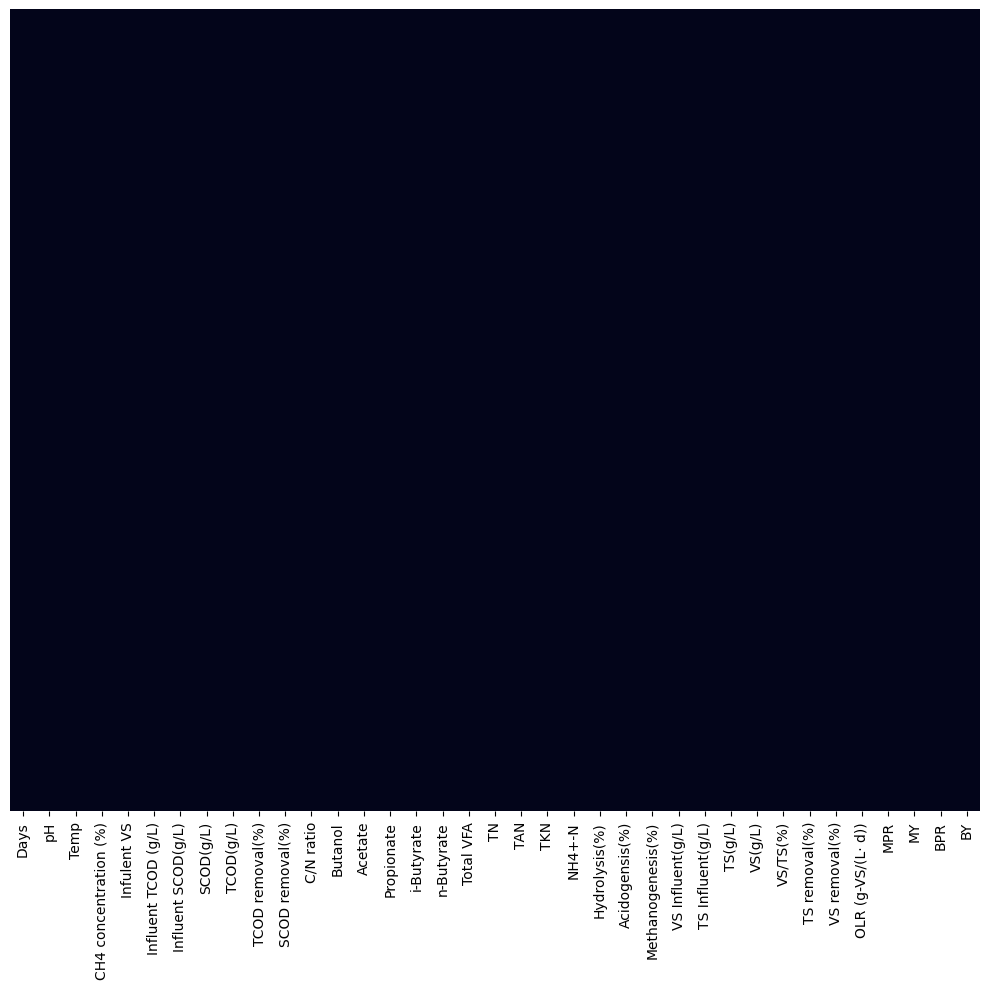

In [36]:
#isnull()看數據缺失值
train["SCOD removal(%)"] = train["SCOD removal(%)"].fillna(0)
plt.figure(figsize=(10,10)) 
sns.heatmap(train.isnull(), yticklabels=False, cbar=False)
plt.tight_layout() 
plt.show()

In [37]:
#看數據維度
print(train.shape)
#看數據訊息
train.info()

(207, 37)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 37 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Days                   207 non-null    float64
 1   pH                     207 non-null    float64
 2   Temp                   207 non-null    float64
 3   CH4 concentration (%)  207 non-null    float64
 4   Infulent VS            207 non-null    float64
 5   Influent TCOD (g/L)    207 non-null    float64
 6   Influent SCOD(g/L)     207 non-null    float64
 7   SCOD(g/L)              207 non-null    float64
 8   TCOD(g/L)              207 non-null    float64
 9   TCOD removal(%)        207 non-null    float64
 10  SCOD removal(%)        207 non-null    float64
 11  C/N ratio              207 non-null    float64
 12  Butanol                207 non-null    float64
 13  Acetate                207 non-null    float64
 14  Propionate             207 non-null    float64
 

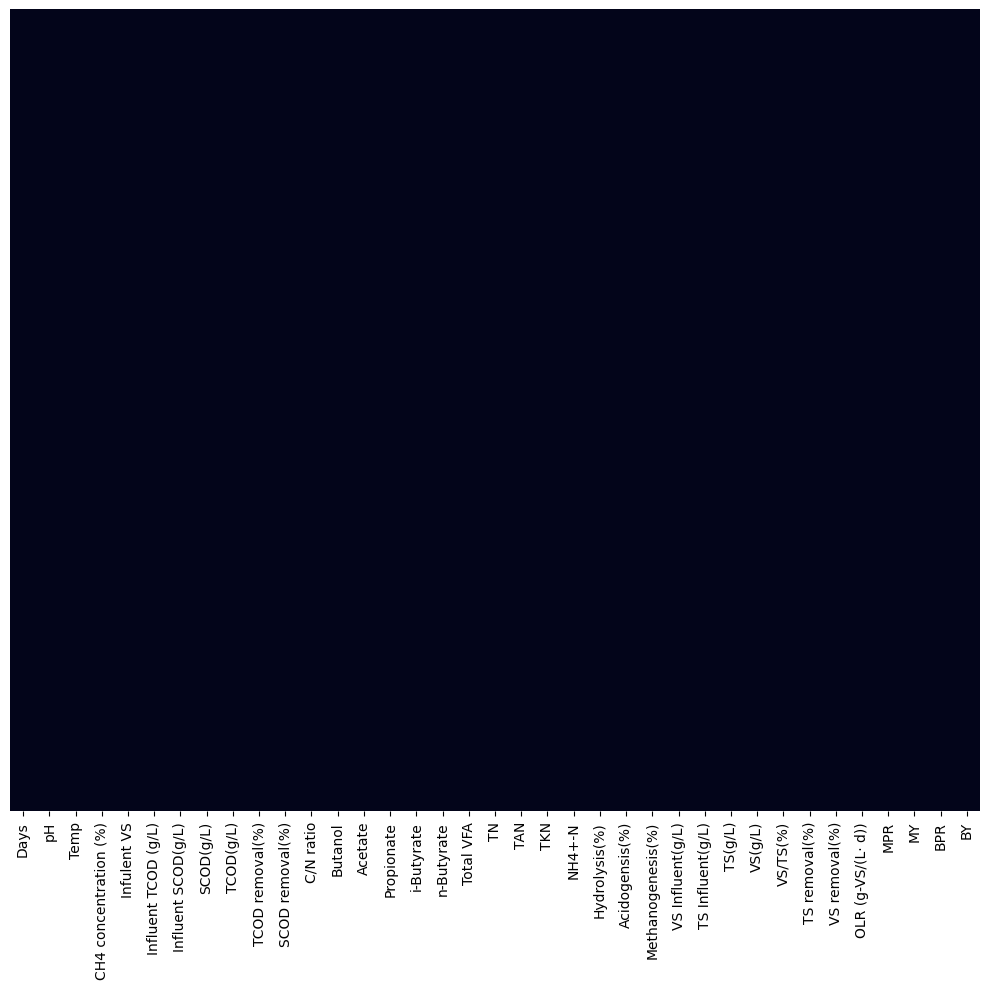

In [38]:
#isnull()看數據缺失值
plt.figure(figsize=(10,10)) 
sns.heatmap(test.isnull(), yticklabels=False, cbar=False)
plt.tight_layout() 
plt.show()

In [39]:
#看數據維度
print(train.shape)
#看數據訊息
train.info()

(207, 37)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 37 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Days                   207 non-null    float64
 1   pH                     207 non-null    float64
 2   Temp                   207 non-null    float64
 3   CH4 concentration (%)  207 non-null    float64
 4   Infulent VS            207 non-null    float64
 5   Influent TCOD (g/L)    207 non-null    float64
 6   Influent SCOD(g/L)     207 non-null    float64
 7   SCOD(g/L)              207 non-null    float64
 8   TCOD(g/L)              207 non-null    float64
 9   TCOD removal(%)        207 non-null    float64
 10  SCOD removal(%)        207 non-null    float64
 11  C/N ratio              207 non-null    float64
 12  Butanol                207 non-null    float64
 13  Acetate                207 non-null    float64
 14  Propionate             207 non-null    float64
 

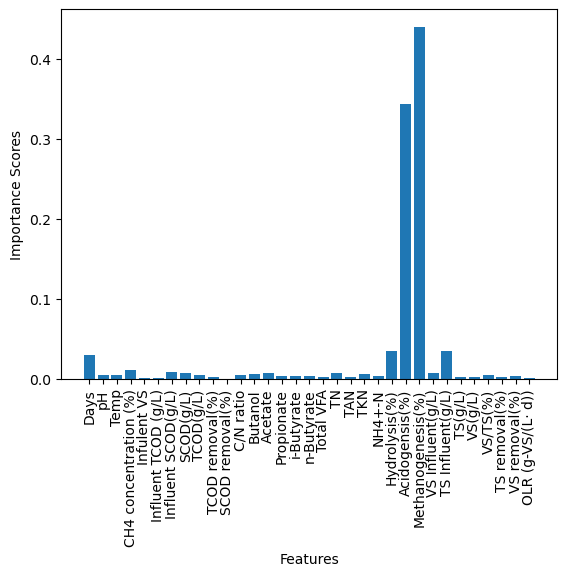

In [40]:
#隨機森林塞選變


# 準備特徵和目標變量
features = ['Days', 'pH', 'Temp', 'CH4 concentration (%)', 'Infulent VS',
            'Influent TCOD (g/L)', 'Influent SCOD(g/L)', 'SCOD(g/L)', 'TCOD(g/L)',
            'TCOD removal(%)', 'SCOD removal(%)', 'C/N ratio', 'Butanol', 'Acetate',
            'Propionate', 'i-Butyrate', 'n-Butyrate', 'Total VFA', 'TN', 'TAN',
            'TKN', 'NH4+-N', 'Hydrolysis(%)', 'Acidogensis(%)', 'Methanogenesis(%)',
            'VS Influent(g/L)', 'TS Influent(g/L)', 'TS(g/L)', 'VS(g/L)',
            'VS/TS(%)', 'TS removal(%)', 'VS removal(%)', 'OLR (g-VS/(L· d))']

targets = ['MPR', 'MY', 'BPR', 'BY']  # 您的目標變量

# 創建特徵和目標變量的數據集
X = train[features]
y = train[targets]

# 構建隨機森林模型
model = RandomForestRegressor(n_estimators=100)

# 訓練模型
model.fit(X, y)

# 提取變數重要性
importance_scores = model.feature_importances_

# 設置閾值為分位數
threshold = np.percentile(importance_scores, 80)

# 選擇重要性分數大於閾值的特徵
selected_features = [feat for feat, score in zip(features, importance_scores) if score > threshold]


# 可視化變數重要性


plt.bar(features, importance_scores)
plt.xlabel('Features')
plt.ylabel('Importance Scores')
plt.xticks(rotation=90)
plt.show()


In [41]:
# 將特徵名稱和重要性分數組成一個字典
importance_dict = dict(zip(features, importance_scores))

# 根據重要性分數進行排序
sorted_importance = sorted(importance_dict.items(), key=lambda x: x[1], reverse=True)

# 提取前五個最重要的特徵變數
top_5_features = [feat for feat, _ in sorted_importance[:5]]

# 輸出前五個最重要的特徵變數
print("Top 5 most important features:")
for feature in top_5_features:
    print(feature)

Top 5 most important features:
Methanogenesis(%)
Acidogensis(%)
Hydrolysis(%)
TS Influent(g/L)
Days


In [42]:
# 將特徵進行數學轉換
train['Methanogenesis_Squared'] = np.square(train['Methanogenesis(%)']) #平方
train['Methanogenesis_SquareRoot'] = np.sqrt(train['Methanogenesis(%)']) #平方根
train['Methanogenesis_Log'] = np.log(train['Methanogenesis(%)'] + 1)  # 自然對數，加1避免對數轉換中的0值

train['Acidogensis_Squared'] = np.square(train['Acidogensis(%)']) #平方
train['Acidogensis_SquareRoot'] = np.sqrt(train['Acidogensis(%)']) #平方根
train['Acidogensis_Log'] = np.log(train['Acidogensis(%)'] + 1)  # 自然對數，加1避免對數轉換中的0值

# 結合多個特徵來創建新的特徵
train['Interaction_Meth_Hydro'] = train['Methanogenesis(%)'] * train['Hydrolysis(%)'] #兩變數相乘
train['Interaction_Meth_Acido'] = train['Methanogenesis(%)'] * train['Acidogensis(%)'] #兩變數相乘
train['Sum_Meth_Hydro'] = train['Methanogenesis(%)'] + train['Hydrolysis(%)'] #兩變數相加
train['Sum_Meth_Acido'] = train['Methanogenesis(%)'] + train['Acidogensis(%)'] #兩變數相加
train['Ratio_Meth_Hydro'] = train['Methanogenesis(%)'] / (train['Hydrolysis(%)'] + 1)  # 除
train['Ratio_Meth_Acido'] = train['Methanogenesis(%)'] / (train['Acidogensis(%)'] + 1)  # 除
train.fillna(0, inplace=True)





# 檢查衍生特徵是否成功添加到數據集中
print(train.head())


       Days        pH      Temp  CH4 concentration (%)  Infulent VS  \
0 -1.719535 -3.052161 -0.089468              -0.560604    -0.556596   
1 -1.702840 -3.052161 -0.089468              -1.174598    -0.556596   
2 -1.686146 -2.855155 -0.089468              -1.379263    -0.556596   
3 -1.669451 -2.855155 -0.089468              -1.379263    -0.556596   
4 -1.652757 -2.658150 -0.089468              -1.583928    -0.556596   

   Influent TCOD (g/L)  Influent SCOD(g/L)  SCOD(g/L)  TCOD(g/L)  \
0            -1.012546           -0.375303   0.909867   1.777937   
1            -1.012546           -0.375303   0.949068   1.667665   
2            -1.012546           -0.375303   1.027471   1.226577   
3            -1.012546           -0.375303   1.066672   1.134684   
4            -1.012546           -0.375303   1.086273   1.061169   

   TCOD removal(%)  SCOD removal(%)  C/N ratio   Butanol   Acetate  \
0        -2.119577              0.0   1.747440 -0.576391 -1.766876   
1        -2.064925      

In [43]:
# 將特徵進行數學轉換
test['Methanogenesis_Squared'] = np.square(test['Methanogenesis(%)']) #平方
test['Methanogenesis_SquareRoot'] = np.sqrt(test['Methanogenesis(%)']) #平方根
test['Methanogenesis_Log'] = np.log(test['Methanogenesis(%)'] + 1)  # 自然對數，加1避免對數轉換中的0值

test['Acidogensis_Squared'] = np.square(test['Acidogensis(%)']) #平方
test['Acidogensis_SquareRoot'] = np.sqrt(test['Acidogensis(%)']) #平方根
test['Acidogensis_Log'] = np.log(test['Acidogensis(%)'] + 1)  # 自然對數，加1避免對數轉換中的0值

# 結合多個特徵來創建新的特徵
test['Interaction_Meth_Hydro'] = test['Methanogenesis(%)'] * test['Hydrolysis(%)'] #兩變數相乘
test['Interaction_Meth_Acido'] = test['Methanogenesis(%)'] * test['Acidogensis(%)'] #兩變數相乘
test['Sum_Meth_Hydro'] = test['Methanogenesis(%)'] + test['Hydrolysis(%)'] #兩變數相加
test['Sum_Meth_Acido'] = test['Methanogenesis(%)'] + test['Acidogensis(%)'] #兩變數相加
test['Ratio_Meth_Hydro'] = test['Methanogenesis(%)'] / (test['Hydrolysis(%)'] + 1)  # 除
test['Ratio_Meth_Acido'] = test['Methanogenesis(%)'] / (test['Acidogensis(%)'] + 1)  # 除
test.fillna(0, inplace=True)





# 檢查衍生特徵是否成功添加到數據集中
print(train.head())


       Days        pH      Temp  CH4 concentration (%)  Infulent VS  \
0 -1.719535 -3.052161 -0.089468              -0.560604    -0.556596   
1 -1.702840 -3.052161 -0.089468              -1.174598    -0.556596   
2 -1.686146 -2.855155 -0.089468              -1.379263    -0.556596   
3 -1.669451 -2.855155 -0.089468              -1.379263    -0.556596   
4 -1.652757 -2.658150 -0.089468              -1.583928    -0.556596   

   Influent TCOD (g/L)  Influent SCOD(g/L)  SCOD(g/L)  TCOD(g/L)  \
0            -1.012546           -0.375303   0.909867   1.777937   
1            -1.012546           -0.375303   0.949068   1.667665   
2            -1.012546           -0.375303   1.027471   1.226577   
3            -1.012546           -0.375303   1.066672   1.134684   
4            -1.012546           -0.375303   1.086273   1.061169   

   TCOD removal(%)  SCOD removal(%)  C/N ratio   Butanol   Acetate  \
0        -2.119577              0.0   1.747440 -0.576391 -1.766876   
1        -2.064925      

In [44]:
# # 確定目標變量和特徵變量
# targets = ["MPR", "MY", "BPR", "BY"]
# features = [col for col in train.columns if col not in targets]

In [45]:
# #熱圖查看數據相關性，數值越接近 1 或 -1 的變數對其相關性越高，0為無相關。
# for target in targets :
#     k = 10
#     corrmat = train.corr()
#     cols = corrmat.nlargest(k, target)[target].index
#     cm = np.corrcoef(train[cols].values.T)
    
#     fig, ax = plt.subplots(figsize=(8, 8))
#     sns.set(font_scale=1.25)
#     hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':10},
#                 yticklabels=cols.values, xticklabels=cols.values)
#     plt.title(f"Top {k} Correlations with {target}")
#     plt.show()

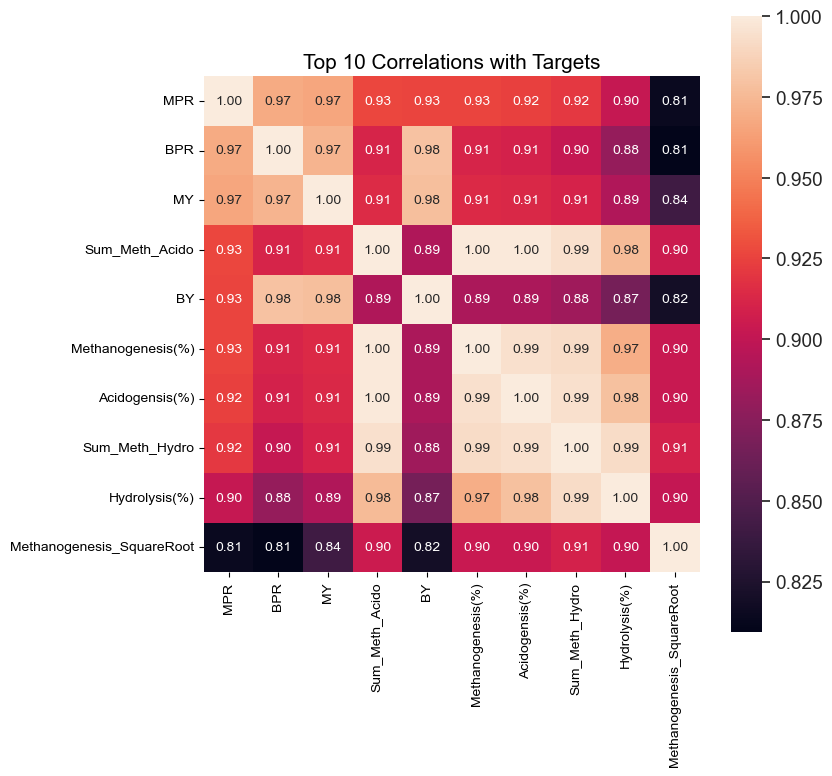

In [46]:
k = 10
corrmat = train.corr()
cols = corrmat.nlargest(k, targets)[targets].index
cm = np.corrcoef(train[cols].values.T)

fig, ax = plt.subplots(figsize=(8, 8))
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':10},
            yticklabels=cols.values, xticklabels=cols.values)
plt.title(f"Top {k} Correlations with Targets")
plt.show()


In [47]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

features = ['Days', 'pH', 'Temp', 'CH4 concentration (%)', 'Infulent VS',
            'Influent TCOD (g/L)', 'Influent SCOD(g/L)', 'SCOD(g/L)', 'TCOD(g/L)',
            'TCOD removal(%)', 'SCOD removal(%)', 'C/N ratio', 'Butanol', 'Acetate',
            'Propionate', 'i-Butyrate', 'n-Butyrate', 'Total VFA', 'TN', 'TAN',
            'TKN', 'NH4+-N', 'Hydrolysis(%)', 'Acidogensis(%)', 'Methanogenesis(%)',
            'VS Influent(g/L)', 'TS Influent(g/L)', 'TS(g/L)', 'VS(g/L)',
            'VS/TS(%)', 'TS removal(%)', 'VS removal(%)', 'OLR (g-VS/(L· d))',
            'Methanogenesis_Squared', 'Methanogenesis_SquareRoot', 'Methanogenesis_Log',
            'Interaction_Meth_Hydro', 'Sum_Meth_Hydro', 'Ratio_Meth_Hydro', 'Acidogensis_Squared',
            'Acidogensis_SquareRoot', 'Acidogensis_Log', 'Interaction_Meth_Acido', 'Sum_Meth_Acido',
            'Ratio_Meth_Acido']

targets = ['MPR', 'MY', 'BPR', 'BY']  

for target in targets:
    print("Target:", target)

   
    X = train[features]
    y = train[target]

    # 使用L1正則化的線性回歸模型（Lasso回歸）作为特徵選擇模型
    lasso = Lasso(alpha=0.1)  
    lasso.fit(X, y)

    # 使用SelectFromModel選擇重要特徵
    sfm = SelectFromModel(lasso)
    X_selected = sfm.transform(X)

    # 索引(特徵)
    feature_indices = sfm.get_support(indices=True)

    # 索引內的特徵名
    selected_features = [features[i] for i in feature_indices]

    print("Selected Features:", selected_features)


Target: MPR
Selected Features: ['Ratio_Meth_Hydro', 'Sum_Meth_Acido', 'Ratio_Meth_Acido']
Target: MY
Selected Features: ['Days', 'Infulent VS', 'Influent SCOD(g/L)', 'TKN', 'TS Influent(g/L)', 'Ratio_Meth_Hydro', 'Sum_Meth_Acido']
Target: BPR
Selected Features: ['Infulent VS', 'Influent SCOD(g/L)', 'TN', 'TKN', 'TS Influent(g/L)', 'Ratio_Meth_Hydro', 'Sum_Meth_Acido', 'Ratio_Meth_Acido']
Target: BY
Selected Features: ['Infulent VS', 'Influent SCOD(g/L)', 'TN', 'TKN', 'TS Influent(g/L)', 'Ratio_Meth_Hydro', 'Sum_Meth_Acido', 'Ratio_Meth_Acido']


In [48]:
# #隨機森林塞選變
# from sklearn.ensemble import RandomForestRegressor

# # 準備特徵和目標變量
# features = ['Days', 'pH', 'Temp', 'CH4 concentration (%)', 'Infulent VS',
#             'Influent TCOD (g/L)', 'Influent SCOD(g/L)', 'SCOD(g/L)', 'TCOD(g/L)',
#             'TCOD removal(%)', 'SCOD removal(%)', 'C/N ratio', 'Butanol', 'Acetate',
#             'Propionate', 'i-Butyrate', 'n-Butyrate', 'Total VFA', 'TN', 'TAN',
#             'TKN', 'NH4+-N', 'Hydrolysis(%)', 'Acidogensis(%)', 'Methanogenesis(%)',
#             'VS Influent(g/L)', 'TS Influent(g/L)', 'TS(g/L)', 'VS(g/L)',
#             'VS/TS(%)', 'TS removal(%)', 'VS removal(%)', 'OLR (g-VS/(L· d))']

# targets = ['MPR', 'MY', 'BPR', 'BY']  # 您的目標變量

# # 創建特徵和目標變量的數據集
# X = test[features]
# y = test[targets]

# # 構建隨機森林模型
# model = RandomForestRegressor(n_estimators=100)

# # 訓練模型
# model.fit(X, y)

# # 提取變數重要性
# importance_scores = model.feature_importances_

# # 可視化變數重要性


# plt.bar(features, importance_scores)
# plt.xlabel('Features')
# plt.ylabel('Importance Scores')
# plt.xticks(rotation=90)
# plt.show()


Target: MPR


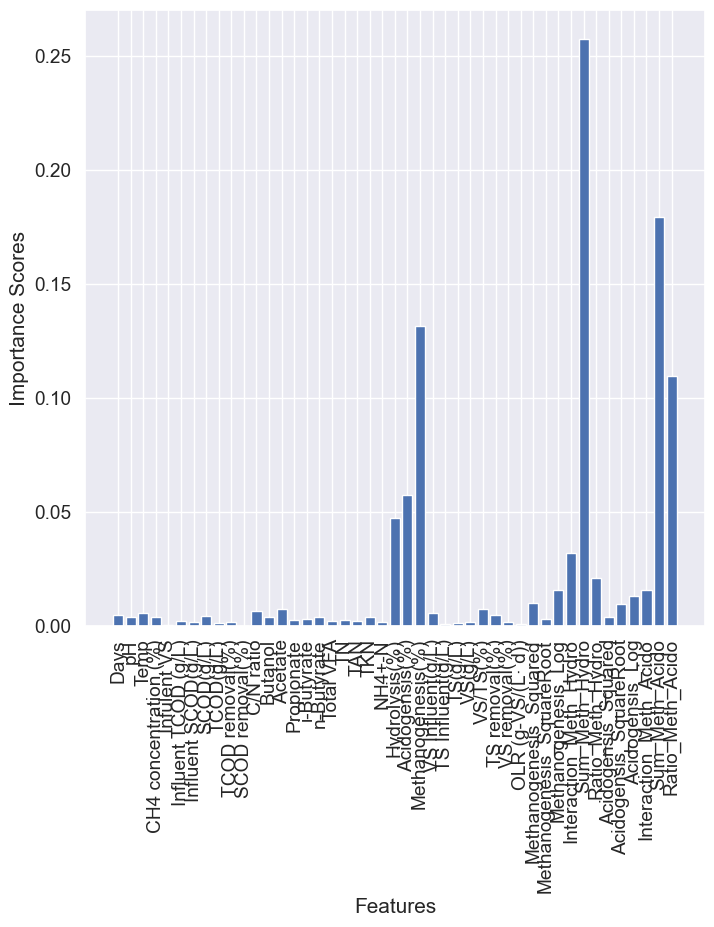

Target: MY


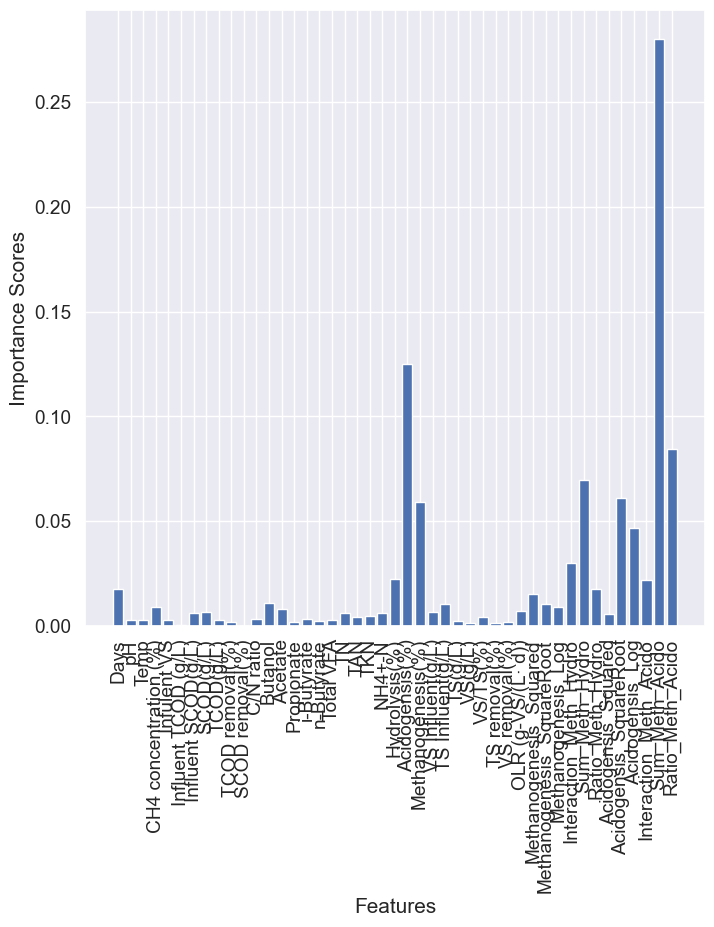

Target: BPR


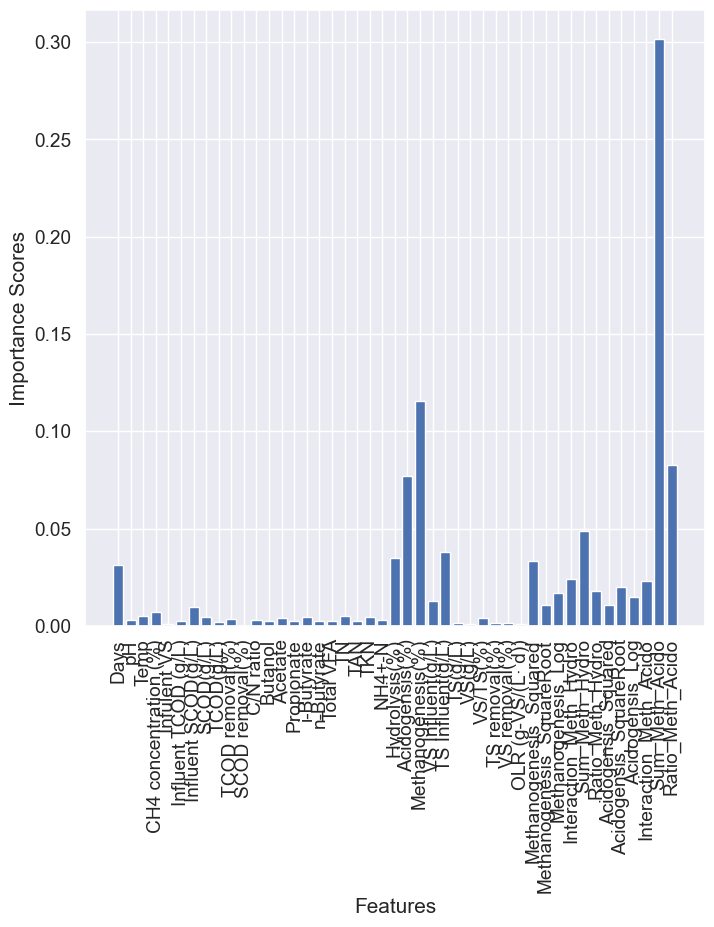

Target: BY


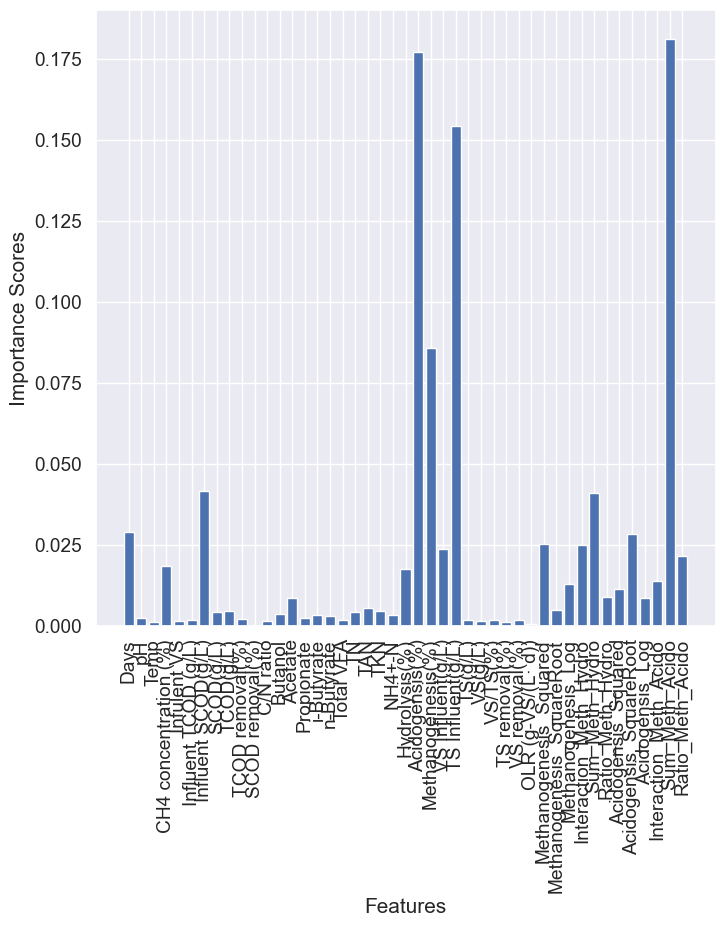

In [49]:
#隨機森林塞選變

# 準備特徵和目標變量
features = ['Days', 'pH', 'Temp', 'CH4 concentration (%)', 'Infulent VS',
            'Influent TCOD (g/L)', 'Influent SCOD(g/L)', 'SCOD(g/L)', 'TCOD(g/L)',
            'TCOD removal(%)', 'SCOD removal(%)', 'C/N ratio', 'Butanol', 'Acetate',
            'Propionate', 'i-Butyrate', 'n-Butyrate', 'Total VFA', 'TN', 'TAN',
            'TKN', 'NH4+-N', 'Hydrolysis(%)', 'Acidogensis(%)', 'Methanogenesis(%)',
            'VS Influent(g/L)', 'TS Influent(g/L)', 'TS(g/L)', 'VS(g/L)',
            'VS/TS(%)', 'TS removal(%)', 'VS removal(%)', 'OLR (g-VS/(L· d))',
            'Methanogenesis_Squared', 'Methanogenesis_SquareRoot', 'Methanogenesis_Log',
            'Interaction_Meth_Hydro', 'Sum_Meth_Hydro', 'Ratio_Meth_Hydro', 'Acidogensis_Squared',
            'Acidogensis_SquareRoot', 'Acidogensis_Log', 'Interaction_Meth_Acido', 'Sum_Meth_Acido',
            'Ratio_Meth_Acido']

targets = ['MPR', 'MY', 'BPR', 'BY']  # 目標變量
target_MPR = train['MPR']
target_MY = train['MY']
target_BPR = train['BPR']
target_BY = train['BY']

for target in targets:
    print("Target:", target)
    
    # 創建特徵和目標變量的數據集
    X = train[features]
    y = train[target]
    
    # 构建随机森林模型
    model = RandomForestRegressor(n_estimators=100)
    
    # 訓練模型
    model.fit(X, y)
    
    # 提取變量重要性
    importance_scores = model.feature_importances_
    
    # 可視化變量重要性
    plt.figure(figsize=(8, 8))
    plt.bar(features, importance_scores)
    plt.xlabel('Features')
    plt.ylabel('Importance Scores')
    plt.xticks(rotation=90)
    plt.show()


In [50]:
#迭代特徵選擇
from sklearn.feature_selection import RFE

model = RandomForestRegressor(n_estimators=300)

rfe = RFE(estimator=model, n_features_to_select=12)  # 選擇保留的特徵數量

X_selected = rfe.fit_transform(X, y)

selected_feature_indexes = rfe.get_support(indices=True)
selected_features = [features[idx] for idx in selected_feature_indexes]



print("使用遞歸特徵消除 (RFE) 選擇特徵:")
print(selected_features)


使用遞歸特徵消除 (RFE) 選擇特徵:
['Days', 'Influent SCOD(g/L)', 'Acidogensis(%)', 'Methanogenesis(%)', 'TS Influent(g/L)', 'Methanogenesis_Squared', 'Interaction_Meth_Hydro', 'Sum_Meth_Hydro', 'Acidogensis_SquareRoot', 'Interaction_Meth_Acido', 'Sum_Meth_Acido', 'Ratio_Meth_Acido']


In [51]:
X_selected = pd.DataFrame(X_selected, columns=selected_features)
scaler = RobustScaler()
X_selected_scaled = scaler.fit_transform(X_selected)
model.fit(X_selected_scaled, y)



RandomForestRegressor(n_estimators=300)

Target: MPR


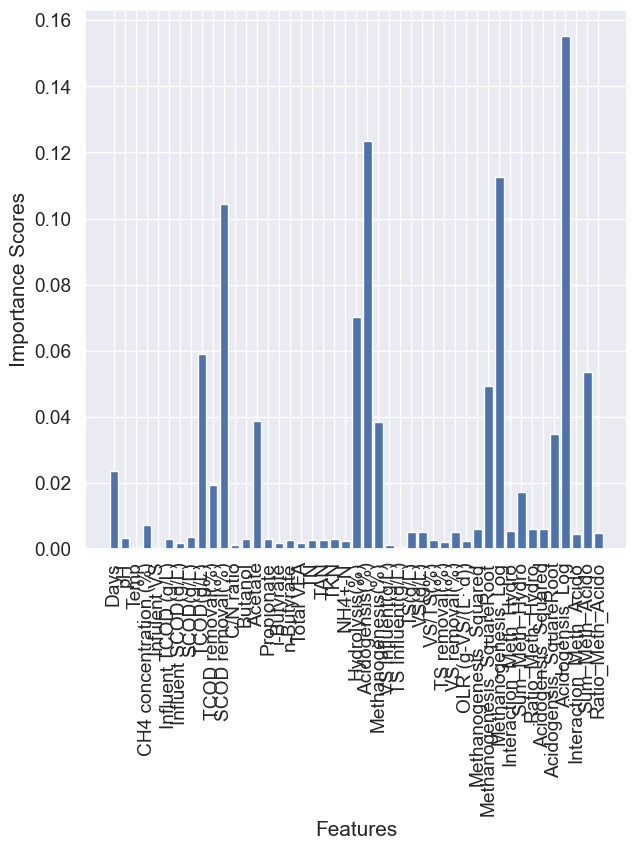

Target: MY


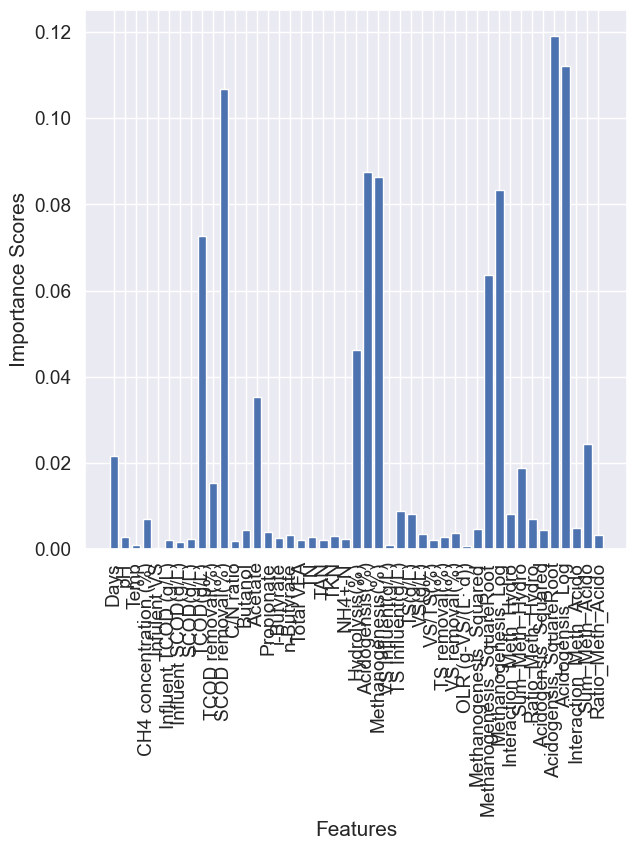

Target: BPR


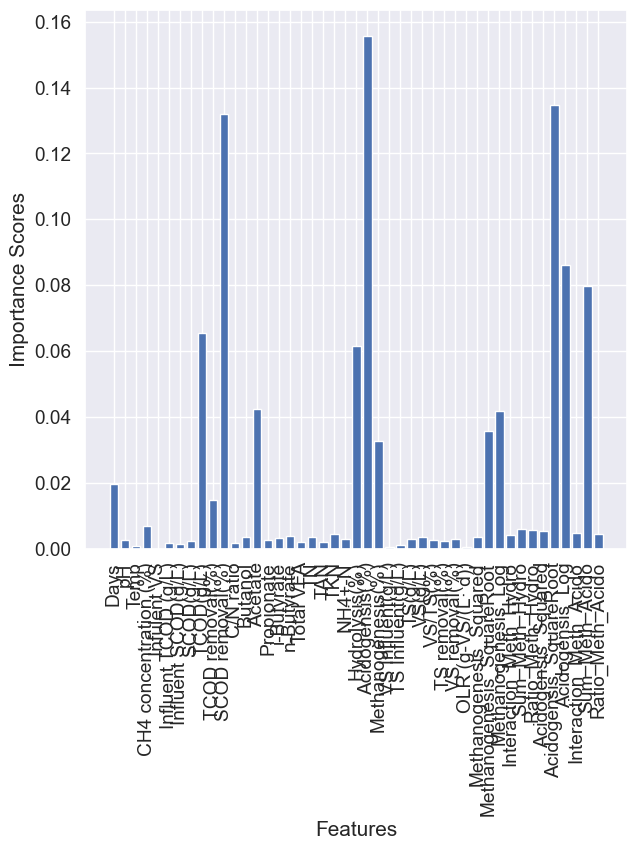

Target: BY


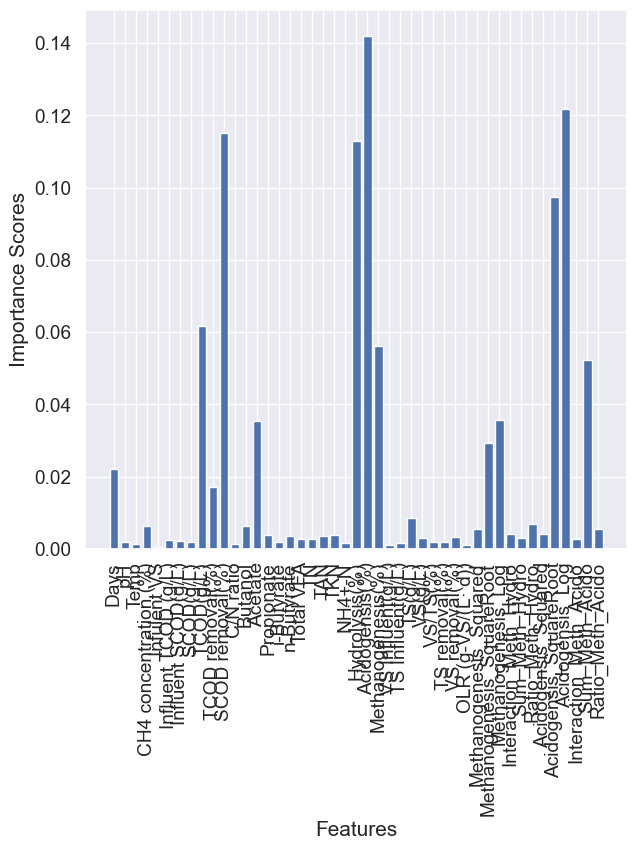

In [52]:
#隨機森林塞選變

# 準備特徵和目標變量
features = ['Days', 'pH', 'Temp', 'CH4 concentration (%)', 'Infulent VS',
            'Influent TCOD (g/L)', 'Influent SCOD(g/L)', 'SCOD(g/L)', 'TCOD(g/L)',
            'TCOD removal(%)', 'SCOD removal(%)', 'C/N ratio', 'Butanol', 'Acetate',
            'Propionate', 'i-Butyrate', 'n-Butyrate', 'Total VFA', 'TN', 'TAN',
            'TKN', 'NH4+-N', 'Hydrolysis(%)', 'Acidogensis(%)', 'Methanogenesis(%)',
            'VS Influent(g/L)', 'TS Influent(g/L)', 'TS(g/L)', 'VS(g/L)',
            'VS/TS(%)', 'TS removal(%)', 'VS removal(%)', 'OLR (g-VS/(L· d))',
            'Methanogenesis_Squared', 'Methanogenesis_SquareRoot', 'Methanogenesis_Log',
            'Interaction_Meth_Hydro', 'Sum_Meth_Hydro', 'Ratio_Meth_Hydro', 'Acidogensis_Squared',
            'Acidogensis_SquareRoot', 'Acidogensis_Log', 'Interaction_Meth_Acido', 'Sum_Meth_Acido',
            'Ratio_Meth_Acido']

targets = ['MPR', 'MY', 'BPR', 'BY']  # 目標變量


test_target_MPR = test['MPR']
test_target_MY = test['MY']
test_target_BPR = test['BPR']
test_target_BY = test['BY']

for target in targets:
    print("Target:", target)
    
    # 創建特徵和目標變量的數據集
    X_test = test[features]
    y_test = test[targets]
    
    # 建構隨機森林
    model = RandomForestRegressor(n_estimators=100)
    
    # 訓練模型
    model.fit(X_test, y_test)
    
    # 提取變量重要性
    importance_scores = model.feature_importances_
    
    # 可視化變量重要性
    plt.figure(figsize=(7, 7))
    plt.bar(features, importance_scores)
    plt.xlabel('Features')
    plt.ylabel('Importance Scores')
    plt.xticks(rotation=90)
    plt.show()


In [53]:
# #隨機森林塞選變數

# # 創建特徵和目標變量的數據集
# X_test = test[features]
# y_test = test[targets]
# test_target_MPR = test['MPR']
# test_target_MY = test['MY']
# test_target_BPR = test['BPR']
# test_target_BY = test['BY']
# # 構建隨機森林模型
# model = RandomForestRegressor(n_estimators=300)

# # 訓練模型
# model.fit(X_test, y_test)

# # 提取變數重要性
# importance_scores = model.feature_importances_

# # 可視化變數重要性


# plt.bar(features, importance_scores)
# plt.xlabel('Features')
# plt.ylabel('Importance Scores')
# plt.xticks(rotation=90)
# plt.show()


In [54]:
#導入
from sklearn.linear_model import ElasticNet, Lasso, BayesianRidge, LassoLarsIC, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold,cross_val_score,train_test_split,cross_val_predict
from sklearn.metrics import mean_squared_error,mean_absolute_error
import xgboost as xgb
import lightgbm as lgb


In [55]:
# 交叉驗證
n_folds = 5

# RMSE
def rmsle_cv(model, X, y):
    kf = KFold(n_folds, shuffle=True, random_state=42).split(X.values)
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=kf))
    return rmse

# MAE
def mae_cv(model, X, y):
    kf = KFold(n_folds, shuffle=True, random_state=42).split(X.values)
    mae = -cross_val_score(model, X, y, scoring="neg_mean_absolute_error", cv=kf)
    return mae

# R-squared
def r2_cv(model, X, y):
    kf = KFold(n_folds, shuffle=True, random_state=42).split(X.values)
    r2 = cross_val_score(model, X, y, scoring="r2", cv=kf)
    return r2


In [56]:
# 用來儲存模型的字典
models_dict = {}

In [57]:
#拆分訓練集和驗證集

# 定義訓練集和驗證集的比例，使用80%的數據作為訓練集，20%的數據作為驗證集
train_size = 0.8

for target_name, target in zip(['MPR', 'MY', 'BPR', 'BY'], [target_MPR, target_MY, target_BPR, target_BY]):
    print("Target:", target_name)
    
    X = train[features].loc[target.index]
    y_selected = target

    # 使用train_test_split來拆分訓練集和驗證集
    X_train, X_valid, y_train, y_valid = train_test_split(X, y_selected, train_size=train_size, random_state=1)

    # Lasso
    lasso = make_pipeline(RobustScaler(), Lasso(alpha=0.0005, random_state=1))
    lasso.fit(X_train, y_train)
    
    # 在驗證集上進行預測並評估性能
    y_pred = lasso.predict(X_valid)
    
    # 更改評估函數，使之適用於驗證集
    mae = mae_cv(lasso, X_train, y_train)
    
    rmse = rmsle_cv(lasso, X_train, y_train)
    
    r2 = r2_cv(lasso, X_train, y_train)

    print("\nLasso MAE score: {:.4f} ({:.4f})\n".format(mae.mean(), mae.std()))
    
    print("\nLasso RMSE score: {:.4f} ({:.4f})\n".format(rmse.mean(), rmse.std()))
    
    print("\nLasso R^2 score: {:.4f} ({:.4f})\n".format(r2.mean(), r2.std()))
    models_dict[target_name + '_lasso'] = lasso
    
    
    #ENet
    ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))
    ENet.fit(X_train, y_train)
    mae = mae_cv(ENet, X_train, y_train)
    rmse = rmsle_cv(ENet, X_train, y_train)
    r2 = r2_cv(ENet, X_train, y_train)
    print("\nElasticNet MAE score: {:.4f} ({:.4f})\n".format(mae.mean(), mae.std()))
    print("\nElasticNet RMSE score: {:.4f} ({:.4f})\n".format(rmse.mean(), rmse.std()))
    print("\nElasticNet R^2 score: {:.4f} ({:.4f})\n".format(r2.mean(), r2.std()))
    models_dict[target_name + '_ENet'] = ENet
    
    #KRR
    KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree= 2,coef0=2.5)
    KRR.fit(X_train, y_train)
    mae = mae_cv(KRR, X_train, y_train)
    rmse = rmsle_cv(KRR, X_train, y_train)
    r2 = r2_cv(KRR, X_train, y_train)
    print("\nKernel Ridge RMSE score: {:.4f} ({:.4f})\n".format(mae.mean(), mae.std()))
    print("\nKernel Ridge RMSE score: {:.4f} ({:.4f})\n".format(rmse.mean(), rmse.std()))
    print("\nKernel Ridge R^2 score: {:.4f} ({:.4f})\n".format(r2.mean(), r2.std()))
    models_dict[target_name + '_KRR'] = KRR
    
    #梯度提升
    GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                    max_depth=4, max_features='sqrt',
                                    min_samples_leaf=15, min_samples_split=10,
                                    loss='huber', random_state=5)
    GBoost.fit(X_train, y_train)
    mae = mae_cv(GBoost, X_train, y_train)
    rmse = rmsle_cv(GBoost, X_train, y_train)
    r2 = r2_cv(GBoost, X_train, y_train)
    print("\nGradient Boosting MAE score: {:.4f} ({:.4f})\n".format(mae.mean(), mae.std()))
    print("\nGradient Boosting RMSE score: {:.4f} ({:.4f})\n".format(rmse.mean(), rmse.std()))
    print("\nGradient Boosting R^2 score: {:.4f} ({:.4f})\n".format(r2.mean(), r2.std()))
    models_dict[target_name + '_GBoost'] = GBoost
    
    #XGB
    model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.4608,     # colsamples_bytree 是列的採樣率    # gamma 是節點劃分所需的最小損失減少值
                             learning_rate=0.05, max_depth=3,               # learning_rate 是每次迭代的步長大小 # max_depth 是樹的最大深度
                             min_child_weight=1.7817,n_estimators=2200,     # min_child_weight 是子節點所需最小樣本數   # n_estimators 是樹的數量
                             subsample=0.5213,                              # subsample 是行的採樣率            
                             reg_alpha=0.4640, reg_lambda=0.8571,           # reg_alpha 和 reg_lambda 是 L1 和 L2 正則化項的權重
                             random_state=7, nthread=-1)                    # nthread 是 CPU 的使用數量
    #XGBoost
    model_xgb.fit(X_train, y_train)
    mae = mae_cv(model_xgb, X_train, y_train)
    rmse = rmsle_cv(model_xgb, X_train, y_train)
    r2 = r2_cv(model_xgb, X_train, y_train)
    print("\nXgboost MAE score: {:.4f} ({:.4f})\n".format(mae.mean(), mae.std()))
    print("\nXgboost RMSE score: {:.4f} ({:.4f})\n".format(rmse.mean(), rmse.std()))
    print("\nXgboost R^2 score: {:.4f} ({:.4f})\n".format(r2.mean(), r2.std()))
    models_dict[target_name + '_xgb'] = model_xgb

    #lgb
    model_lgb = lgb.LGBMRegressor(objective='regression', num_leaves=5,
                                learning_rate=0.05, n_estimators=720,
                                max_bin=55, subsample=0.8, subsample_freq=5,
                                colsample_bytree=0.2319,
                                min_child_samples=6, min_child_weight=11)

    model_lgb.fit(X_train, y_train)
    mae = mae_cv(model_lgb, X_train, y_train)
    rmse = score = rmsle_cv(model_lgb, X_train, y_train)
    r2 = r2_cv(model_lgb, X_train, y_train)
    print("\nLGB MAE score: {:.4f} ({:.4f})\n".format(mae.mean(), mae.std()))
    print("\nLGB RMSE score: {:.4f} ({:.4f})\n" .format(rmse.mean(), rmse.std()))
    print("\nLGB R^2 score: {:.4f} ({:.4f})\n".format(r2.mean(), r2.std()))
    models_dict[target_name + '_lgb'] = model_lgb

Target: MPR

Lasso MAE score: 0.2808 (0.0621)


Lasso RMSE score: 0.4319 (0.1366)


Lasso R^2 score: 0.8000 (0.1399)


ElasticNet MAE score: 0.2820 (0.0622)


ElasticNet RMSE score: 0.4331 (0.1366)


ElasticNet R^2 score: 0.7989 (0.1406)


Kernel Ridge RMSE score: 0.3963 (0.1460)


Kernel Ridge RMSE score: 1.0583 (0.7668)


Kernel Ridge R^2 score: -0.6511 (1.7898)


Gradient Boosting MAE score: 0.2557 (0.0446)


Gradient Boosting RMSE score: 0.3944 (0.0962)


Gradient Boosting R^2 score: 0.8453 (0.0736)


Xgboost MAE score: 0.2461 (0.0563)


Xgboost RMSE score: 0.3906 (0.1109)


Xgboost R^2 score: 0.8478 (0.0847)


LGB MAE score: 0.2807 (0.0593)


LGB RMSE score: 0.4287 (0.1066)


LGB R^2 score: 0.8194 (0.0830)

Target: MY

Lasso MAE score: 0.2767 (0.0626)


Lasso RMSE score: 0.4373 (0.1392)


Lasso R^2 score: 0.7934 (0.1386)


ElasticNet MAE score: 0.2781 (0.0623)


ElasticNet RMSE score: 0.4384 (0.1392)


ElasticNet R^2 score: 0.7925 (0.1392)


Kernel Ridge RMSE score: 0.3845 (0.1394

In [58]:
# for target_name, target in zip(['MPR', 'MY', 'BPR', 'BY'], [target_MPR, target_MY, target_BPR, target_BY]):
#     print("Target:", target_name)
    
#     X = train[features].loc[target.index]
#     y_selected = target
        
#     # Lasso
#     lasso = make_pipeline(RobustScaler(), Lasso(alpha=0.0005, random_state=1))
#     lasso.fit(X, y_selected)
#     y_pred = lasso.predict(X)
#     mae = mae_cv(lasso, X, y_selected)
    
#     rmse = rmsle_cv(lasso, X, y_selected)
    
#     r2 = r2_cv(lasso, X, y_selected)
#     print("\nLasso MAE score: {:.4f} ({:.4f})\n".format(mae.mean(), mae.std()))
    
#     print("\nLasso RMSE score: {:.4f} ({:.4f})\n".format(rmse.mean(), rmse.std()))
    
#     print("\nLasso R^2 score: {:.4f} ({:.4f})\n".format(r2.mean(), r2.std()))
#     models_dict[target_name + '_lasso'] = lasso

In [59]:
# #Lasso
# lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005,random_state=1))

# #Lasso MAE得分
# score_mae = mae_cv(lasso, X_selected_scaled, y_selected)
# print("\nLasso MAE score: {:.4f} ({:.4f})\n".format(score_mae.mean(), score_mae.std()))

# #Lasso RMSE得分
# score = rmsle_cv(lasso, X_selected_scaled, y_selected)
# print("\nLsso RMSE score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

In [60]:
# for target_name, target in zip(['MPR', 'MY', 'BPR', 'BY'], [target_MPR, target_MY, target_BPR, target_BY]):
#     print("Target:", target_name)
    
#     X = train[features].loc[target.index]
#     y_selected = target
    
#     #ENet
#     ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))
#     ENet.fit(X, y_selected)
#     mae = mae_cv(ENet, X, y_selected)
#     rmse = rmsle_cv(ENet, X, y_selected)
#     r2 = r2_cv(ENet, X, y_selected)
#     print("\nElasticNet MAE score: {:.4f} ({:.4f})\n".format(mae.mean(), mae.std()))
#     print("\nElasticNet RMSE score: {:.4f} ({:.4f})\n".format(rmse.mean(), rmse.std()))
#     print("\nElasticNet R^2 score: {:.4f} ({:.4f})\n".format(r2.mean(), r2.std()))
#     models_dict[target_name + '_ENet'] = ENet

In [61]:
# #ENet
# ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

# #ENet MAE得分
# score_mae = mae_cv(ENet, X_selected_scaled, y_selected)
# print("\nElasticNet MAE score: {:.4f} ({:.4f})\n".format(score_mae.mean(), score_mae.std()))

# #ENet RMSE得分
# score = rmsle_cv(ENet, X_selected_scaled, y_selected)
# print("\nElasticNet RMSE score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

In [62]:
# for target_name, target in zip(['MPR', 'MY', 'BPR', 'BY'], [target_MPR, target_MY, target_BPR, target_BY]):
#     print("Target:", target_name)
    
#     X = train[features].loc[target.index]
#     y_selected = target
    
#     #KRR
#     KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree= 2,coef0=2.5)
#     KRR.fit(X, y_selected)
#     mae = mae_cv(KRR, X, y_selected)
#     rmse = rmsle_cv(KRR, X, y_selected)
#     r2 = r2_cv(KRR, X, y_selected)
#     print("\nKernel Ridge RMSE score: {:.4f} ({:.4f})\n".format(mae.mean(), mae.std()))
#     print("\nKernel Ridge RMSE score: {:.4f} ({:.4f})\n".format(rmse.mean(), rmse.std()))
#     print("\nKernel Ridge R^2 score: {:.4f} ({:.4f})\n".format(r2.mean(), r2.std()))
#     models_dict[target_name + '_KRR'] = KRR

In [63]:
# #KRR
# KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree= 2,coef0=2.5)

# #KRR MAE得分
# score_mae = mae_cv(KRR, X_selected_scaled, y_selected)
# print("\nKernel Ridge RMSE score: {:.4f} ({:.4f})\n".format(score_mae.mean(), score_mae.std()))

# #KRR RMSE得分
# score = rmsle_cv(KRR, X_selected_scaled, y_selected)
# print("\nKernel Ridge RMSE score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

In [64]:
# for target_name, target in zip(['MPR', 'MY', 'BPR', 'BY'], [target_MPR, target_MY, target_BPR, target_BY]):
#     print("Target:", target_name)
    
#     #梯度提升
#     GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,    # 樹的數量（n_estimators）    # 學習率（learning_rate）
#                                     max_depth=4, max_features='sqrt',            # 樹的最大深度（max_depth）    # 特徵的最大數量（max_features）
#                                     min_samples_leaf=15, min_samples_split=10,  # 每個葉子節點最小樣本數（min_samples_leaf）    # 節點分裂所需最小樣本數（min_samples_split）
#                                     loss='huber', random_state=5)               # 損失函數（loss）
#     #GBoost 得分
#     GBoost.fit(X, y_selected)
#     mae = mae_cv(GBoost, X, y_selected)
#     rmse = rmsle_cv(GBoost, X, y_selected)
#     r2 = r2_cv(GBoost, X, y_selected)
#     print("\nGradient Boosting MAE score: {:.4f} ({:.4f})\n".format(mae.mean(), mae.std()))
#     print("\nGradient Boosting RMSE score: {:.4f} ({:.4f})\n".format(rmse.mean(), rmse.std()))
#     print("\nGradient Boosting R^2 score: {:.4f} ({:.4f})\n".format(r2.mean(), r2.std()))
#     models_dict[target_name + '_GBoost'] = GBoost

In [65]:
# #梯度提升
# GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
#                                    max_depth=4, max_features='sqrt',
#                                    min_samples_leaf=15, min_samples_split=10,
#                                    loss='huber', random_state=5)
# # 樹的數量（n_estimators）
# # 學習率（learning_rate）
# # 樹的最大深度（max_depth）
# # 特徵的最大數量（max_features）
# # 每個葉子節點最小樣本數（min_samples_leaf）
# # 節點分裂所需最小樣本數（min_samples_split）
# # 損失函數（loss）

# #GBoost MAE得分
# score_mae = mae_cv(GBoost, X_selected_scaled, y_selected)
# print("\nGradient Boosting MAE score: {:.4f} ({:.4f})\n".format(score_mae.mean(), score_mae.std()))

# #GBoost RMSE得分
# score = rmsle_cv(GBoost, X_selected_scaled, y_selected)
# print("\nGradient Boosting RMSE score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

In [66]:
# warnings.filterwarnings("ignore", message="Parameters: { \"silent\" } are not used.")
# for target_name, target in zip(['MPR', 'MY', 'BPR', 'BY'], [target_MPR, target_MY, target_BPR, target_BY]):
#     print("Target:", target_name)
    
#     #XGB
#     model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.4608,     # colsamples_bytree 是列的採樣率    # gamma 是節點劃分所需的最小損失減少值
#                              learning_rate=0.05, max_depth=3,               # learning_rate 是每次迭代的步長大小 # max_depth 是樹的最大深度
#                              min_child_weight=1.7817,n_estimators=2200,     # min_child_weight 是子節點所需最小樣本數   # n_estimators 是樹的數量
#                              subsample=0.5213,                              # subsample 是行的採樣率            
#                              reg_alpha=0.4640, reg_lambda=0.8571,           # reg_alpha 和 reg_lambda 是 L1 和 L2 正則化項的權重
#                              random_state=7, nthread=-1)                    # nthread 是 CPU 的使用數量
#     #XGBoost
#     model_xgb.fit(X, y_selected)
#     mae = mae_cv(model_xgb, X, y_selected)
#     rmse = rmsle_cv(model_xgb, X, y_selected)
#     r2 = r2_cv(model_xgb, X, y_selected)
#     print("\nXgboost MAE score: {:.4f} ({:.4f})\n".format(mae.mean(), mae.std()))
#     print("\nXgboost RMSE score: {:.4f} ({:.4f})\n".format(rmse.mean(), rmse.std()))
#     print("\nXgboost R^2 score: {:.4f} ({:.4f})\n".format(r2.mean(), r2.std()))
#     models_dict[target_name + '_xgb'] = model_xgb

In [67]:
# warnings.filterwarnings("ignore", category=UserWarning)
# #XGB
# model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.4608,
#                              learning_rate=0.05, max_depth=3,
#                              min_child_weight=1.7817,n_estimators=2200,
#                              subsample=0.5213,silent=1,
#                              reg_alpha=0.4640, reg_lambda=0.8571,
#                              random_state=7, nthread=-1)
# # colsamples_bytree 是列的採樣率
# # gamma 是節點劃分所需的最小損失減少值
# # learning_rate 是每次迭代的步長大小
# # max_depth 是樹的最大深度
# # min_child_weight 是子節點所需最小樣本數
# # n_estimators 是樹的數量
# # subsample 是行的採樣率
# # reg_alpha 和 reg_lambda 是 L1 和 L2 正則化項的權重
# # random_state 是隨機種子
# # nthread 是 CPU 的使用數量

# #XGBoost MAE得分
# score_mae = mae_cv(model_xgb, X_selected_scaled, y_selected)
# print("\nXgboost MAE score: {:.4f} ({:.4f})\n".format(score_mae.mean(), score_mae.std()))

# #XGB RMSE得分
# score = rmsle_cv(model_xgb, X_selected_scaled, y_selected)
# print("\nXgboost RMSE score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

In [68]:
# warnings.filterwarnings("ignore", message="Parameters: { \"silent\" } are not used.")
# for target_name, target in zip(['MPR', 'MY', 'BPR', 'BY'], [target_MPR, target_MY, target_BPR, target_BY]):
    
#     #lgb
#     model_lgb = lgb.LGBMRegressor(objective='regression', num_leaves=5,
#                                 learning_rate=0.05, n_estimators=720,
#                                 max_bin=55, subsample=0.8, subsample_freq=5,
#                                 colsample_bytree=0.2319,
#                                 min_child_samples=6, min_child_weight=11)

#     model_lgb.fit(X, y_selected)
#     mae = mae_cv(model_lgb, X, y_selected)
#     rmse = score = rmsle_cv(model_lgb, X, y_selected)
#     r2 = r2_cv(model_lgb, X, y_selected)
#     print("\nLGB MAE score: {:.4f} ({:.4f})\n".format(mae.mean(), mae.std()))
#     print("\nLGB RMSE score: {:.4f} ({:.4f})\n" .format(rmse.mean(), rmse.std()))
#     print("\nLGB R^2 score: {:.4f} ({:.4f})\n".format(r2.mean(), r2.std()))
#     models_dict[target_name + '_lgb'] = model_lgb

In [69]:
# #lgb
# model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
#                               learning_rate=0.05, n_estimators=720,
#                               max_bin = 55, bagging_fraction = 0.8,
#                               bagging_freq = 5, feature_fraction = 0.2319,
#                               feature_fraction_seed=9, bagging_seed=9,
#                               min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

# #LightGB MAE得分
# score_mae = mae_cv(model_lgb, X_selected_scaled, y_selected)
# print("\nLGB MAE score: {:.4f} ({:.4f})\n".format(score_mae.mean(), score_mae.std()))

# #LightGB RMSE得分
# score = rmsle_cv(model_lgb, X_selected_scaled, y_selected)
# print("\nLGB RMSE score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

In [70]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 對於test進行相同的特徵選擇
X_test_selected = test[features]

# 對每個目標變量進行預測
for target_name in ['MPR', 'MY', 'BPR', 'BY']:
    y_test = test[target_name]
    
    print("Target:", target_name)
    
    # Lasso
    y_pred_lasso = models_dict[target_name + '_lasso'].predict(X_test_selected)
    mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
    rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
    r2_lasso = r2_score(y_test, y_pred_lasso)
    print("Lasso MAE: {:.4f}".format(mae_lasso))
    print("Lasso RMSE: {:.4f}".format(rmse_lasso))
    print("Lasso R-squared: {:.4f}".format(r2_lasso))
    
    # ENet
    y_pred_ENet = models_dict[target_name + '_ENet'].predict(X_test_selected)
    mae_ENet = mean_absolute_error(y_test, y_pred_ENet)
    rmse_ENet = np.sqrt(mean_squared_error(y_test, y_pred_ENet))
    r2_ENet = r2_score(y_test, y_pred_ENet)
    print("ElasticNet MAE: {:.4f}".format(mae_ENet))
    print("ElasticNet RMSE: {:.4f}".format(rmse_ENet))
    print("ElasticNet R-squared: {:.4f}".format(r2_ENet))
    
    # KRR
    y_pred_KRR = models_dict[target_name + '_KRR'].predict(X_test_selected)
    mae_KRR = mean_absolute_error(y_test, y_pred_KRR)
    rmse_KRR = np.sqrt(mean_squared_error(y_test, y_pred_KRR))
    r2_KRR = r2_score(y_test, y_pred_KRR)
    print("Kernel Ridge MAE: {:.4f}".format(mae_KRR))
    print("Kernel Ridge RMSE: {:.4f}".format(rmse_KRR))
    print("Kernel Ridge R-squared: {:.4f}".format(r2_KRR))
    
    # GBoost
    y_pred_GBoost = models_dict[target_name + '_GBoost'].predict(X_test_selected)
    mae_GBoost = mean_absolute_error(y_test, y_pred_GBoost)
    rmse_GBoost = np.sqrt(mean_squared_error(y_test, y_pred_GBoost))
    r2_GBoost = r2_score(y_test, y_pred_GBoost)
    print("Gradient Boosting MAE: {:.4f}".format(mae_GBoost))
    print("Gradient Boosting RMSE: {:.4f}".format(rmse_GBoost))
    print("Gradient Boosting R-squared: {:.4f}".format(r2_GBoost))
    
    #XGB
    y_pred_xgb = models_dict[target_name + '_xgb'].predict(X_test_selected)
    mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
    rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
    r2_xgb = r2_score(y_test, y_pred_xgb)
    print("XGBoost MAE: {:.4f}".format(mae_xgb))
    print("XGBoost RMSE: {:.4f}".format(rmse_xgb))
    print("XGBoost R-squared: {:.4f}".format(r2_xgb))
    
    #lgb
    y_pred_lgb = models_dict[target_name + '_lgb'].predict(X_test_selected)
    mae_lgb = mean_absolute_error(y_test, y_pred_lgb)
    rmse_lgb = np.sqrt(mean_squared_error(y_test, y_pred_lgb))
    r2_lgb = r2_score(y_test, y_pred_lgb)
    print("LightGBM MAE: {:.4f}".format(mae_lgb))
    print("LightGBM RMSE: {:.4f}".format(rmse_lgb))
    print("LightGBM R-squared: {:.4f}".format(r2_lgb))
    

Target: MPR
Lasso MAE: 0.3019
Lasso RMSE: 0.4116
Lasso R-squared: 0.8298
ElasticNet MAE: 0.3016
ElasticNet RMSE: 0.4114
ElasticNet R-squared: 0.8300
Kernel Ridge MAE: 0.3592
Kernel Ridge RMSE: 0.6376
Kernel Ridge R-squared: 0.5915
Gradient Boosting MAE: 0.3019
Gradient Boosting RMSE: 0.4466
Gradient Boosting R-squared: 0.7996
XGBoost MAE: 0.2773
XGBoost RMSE: 0.4013
XGBoost R-squared: 0.8382
LightGBM MAE: 0.3054
LightGBM RMSE: 0.4412
LightGBM R-squared: 0.8044
Target: MY
Lasso MAE: 0.3769
Lasso RMSE: 0.4935
Lasso R-squared: 0.7553
ElasticNet MAE: 0.3770
ElasticNet RMSE: 0.4940
ElasticNet R-squared: 0.7548
Kernel Ridge MAE: 0.4002
Kernel Ridge RMSE: 0.6830
Kernel Ridge R-squared: 0.5313
Gradient Boosting MAE: 0.3224
Gradient Boosting RMSE: 0.4460
Gradient Boosting R-squared: 0.8001
XGBoost MAE: 0.3085
XGBoost RMSE: 0.4254
XGBoost R-squared: 0.8182
LightGBM MAE: 0.3218
LightGBM RMSE: 0.4338
LightGBM R-squared: 0.8109
Target: BPR
Lasso MAE: 0.3851
Lasso RMSE: 0.4856
Lasso R-squared: 0.763

In [71]:
# 對於test進行相同的特徵選擇
X_test_selected = test[features]


# 對每個目標變量進行預測
for target_name in ['MPR', 'MY', 'BPR', 'BY']:
    y_test = test[target_name]
    
    print("Target:", target_name)
    
    # Lasso
    y_pred_lasso = models_dict[target_name + '_lasso'].predict(X_test_selected)
    print("Lasso predictions:", y_pred_lasso)
    
    # ENet
    y_pred_ENet = models_dict[target_name + '_ENet'].predict(X_test_selected)
    print("ElasticNet predictions:", y_pred_ENet)
    
    # KRR
    y_pred_KRR = models_dict[target_name + '_KRR'].predict(X_test_selected)
    print("Kernel Ridge predictions:", y_pred_KRR)
    
    # GBoost
    y_pred_GBoost = models_dict[target_name + '_GBoost'].predict(X_test_selected)
    print("Gradient Boosting predictions:", y_pred_GBoost)
    
    # XGB
    y_pred_xgb = models_dict[target_name + '_xgb'].predict(X_test_selected)
    print("Xgboost predictions:", y_pred_xgb)
    
    # LGB
    y_pred_lgb = models_dict[target_name + '_lgb'].predict(X_test_selected)
    print("LGB predictions:", y_pred_lgb)

Target: MPR
Lasso predictions: [-1.2851728  -1.45589304 -1.44810676 -1.36117683 -1.51203033 -1.33355379
 -1.5021069  -1.88350221 -1.80069659 -1.77188045 -1.63403141 -1.62505807
 -1.46102279 -1.22552568 -1.3430246  -1.56254934 -1.52481732 -1.43042165
 -1.71962764 -1.5172036  -1.40465173 -1.60796035 -1.35406445 -0.85122175
 -0.74039631 -0.74855846 -1.29758317 -1.21543948 -0.91665335 -0.72580453
 -0.60119925 -0.93961659 -1.14745226 -0.76698984 -0.14251664 -0.28683991
 -0.30767711 -0.11638189 -0.4258185  -0.08819689 -0.16648727  0.07577244
  0.13865969  0.33244023  0.26404719  0.45812981  0.69510839  0.5619483
  0.33895445  0.32792498  0.28042632  0.36828989  0.42081768  0.43959572
  0.46004073  0.45574607  0.40725556  0.54964917  0.62105749  0.67833715
  0.79228903  0.73416215  0.63003666  0.74718568  0.73322976  0.69548404
  0.70744294  0.69069278  0.60349377  0.6952226   0.71032744  0.80644812
  0.883484    0.95356424  1.01933625  0.91647264  0.8253582   0.92843427
  1.06206185  0.80991

In [72]:
#集成模型
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # 初始化函數，將傳入的模型列表保存為類的属性
    def fit(self, X, y):
        self.models = [clone(x) for x in self.models]
        
        # 使用新的模型對數據進行訓練
        for model in self.models:
            model.fit(X, y)
 
        return self
    
    #對新的模型進行預測，並將預測結果進行均值計算，作為最終結果
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models
        ])
        return np.mean(predictions, axis=1)  

In [73]:
averaged_models = AveragingModels(models = (model_lgb, GBoost, model_xgb))

train_size = 0.8
models_dict = {}

for target_name, target in zip(['MPR', 'MY', 'BPR', 'BY'], [target_MPR, target_MY, target_BPR, target_BY]):
    print("Target:", target_name)
    
    X = train[features].loc[target.index]
    y_selected = target

    # 使用 train_test_split 將數據分為訓練集和驗證集
    X_train, X_valid, y_train, y_valid = train_test_split(X, y_selected, train_size=train_size, random_state=1)

    # 在驗證集上進行預測
    y_pred = averaged_models.predict(X_valid)

    # 計算 MAE
    mae = mean_absolute_error(y_valid, y_pred)

    # 計算 RMSE
    rmse = np.sqrt(mean_squared_error(y_valid, y_pred))

    # 計算 R^2
    r2 = r2_score(y_valid, y_pred)

    print("averaged_models MAE score: {:.4f}".format(mae))
    print("averaged_models RMSE score: {:.4f}".format(rmse))
    print("averaged_models R^2 score: {:.4f}".format(r2))


Target: MPR
averaged_models MAE score: 0.2986
averaged_models RMSE score: 0.4084
averaged_models R^2 score: 0.7299
Target: MY
averaged_models MAE score: 0.2351
averaged_models RMSE score: 0.3324
averaged_models R^2 score: 0.8375
Target: BPR
averaged_models MAE score: 0.2257
averaged_models RMSE score: 0.3243
averaged_models R^2 score: 0.8440
Target: BY
averaged_models MAE score: 0.2262
averaged_models RMSE score: 0.3464
averaged_models R^2 score: 0.8346
